# RAIN PREDICTION

### Import dependencies

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fontstyle
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

### Getting data

In [3]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
features = list(df.columns)
features

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

### Getting Numerical and Categorical features

In [6]:
# Numerical and categorical data
numerical_features = []
categorical_features = []

for feature in features :
    if(df[feature].dtype == 'O') :
        categorical_features.append(feature)
    else :
        numerical_features.append(feature)

print("Total numerical features are {} \nTotal categorical features are {} ".format(len(numerical_features), len(categorical_features)))

Total numerical features are 16 
Total categorical features are 7 


In [7]:
print("Numerical features :\n{}\n\nCategotical features :\n{}".format(numerical_features, categorical_features))

Numerical features :
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categotical features :
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


## Data analysis

### Categorical features analysis
### univariate analysis on target feature

In [8]:
# univariate analysis
# Analyzing the target variable "RainTomorrow"

print('''Null values in "RainTommorow" are {}'''.format(df["RainTomorrow"].isnull().sum() ))

Null values in "RainTommorow" are 3267


In [9]:
print('''Values in "RainTomorrow" \n {}"'''.format(df["RainTomorrow"].unique()))

Values in "RainTomorrow" 
 ['No' 'Yes' nan]"


In [10]:
print('''Values in "RainTomorrow" \n {}"'''.format(df["RainTomorrow"].value_counts(dropna=False)))

Values in "RainTomorrow" 
 No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64"


In [11]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

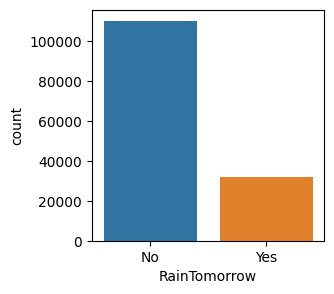

In [12]:
f, ax = plt.subplots(figsize=(3, 3))
ax = sns.countplot(x="RainTomorrow", data=df)
plt.show()

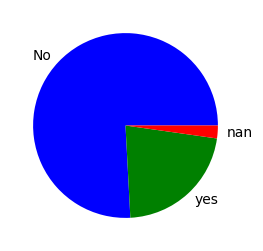

In [13]:
f, ax = plt.subplots(figsize=(3, 3))
ax = plt.pie(x=df["RainTomorrow"].value_counts(dropna=False), data=df, labels=['No', 'yes', 'nan'], colors=['blue','green','red'], )
plt.show()

- Rain tomorrow contains two values "YES", "NO".
- There are some null values to be replaced
- Most of the data has target as "NO".

### Bivaraite analysis

##### Categorical features analysis

- Date variable analysis
- Location variable analysis
- Effect of NAN values on target for other variables

In [14]:
# Categorical features analysis

categorical_df = df[categorical_features]
categorical_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [15]:
# Check for cardinality
for feature in categorical_features:
    print("Unique values in {} are : {}".format(feature, len(df[feature].unique())))

Unique values in Date are : 3436
Unique values in Location are : 49
Unique values in WindGustDir are : 17
Unique values in WindDir9am are : 17
Unique values in WindDir3pm are : 17
Unique values in RainToday are : 3
Unique values in RainTomorrow are : 3


##### Date

In [16]:
# Split the "Date"
categorical_df["Date"] = pd.to_datetime(df['Date'])

In [18]:
categorical_df['day'] = categorical_df['Date'].dt.day
categorical_df['month'] = categorical_df['Date'].dt.month
categorical_df['year'] = categorical_df['Date'].dt.year
categorical_df.head(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,day,month,year
0,2008-12-01,Albury,W,W,WNW,No,No,1,12,2008
1,2008-12-02,Albury,WNW,NNW,WSW,No,No,2,12,2008
2,2008-12-03,Albury,WSW,W,WSW,No,No,3,12,2008
3,2008-12-04,Albury,NE,SE,E,No,No,4,12,2008
4,2008-12-05,Albury,W,ENE,NW,No,No,5,12,2008
5,2008-12-06,Albury,WNW,W,W,No,No,6,12,2008
6,2008-12-07,Albury,W,SW,W,No,No,7,12,2008
7,2008-12-08,Albury,W,SSE,W,No,No,8,12,2008
8,2008-12-09,Albury,NNW,SE,NW,No,Yes,9,12,2008
9,2008-12-10,Albury,W,S,SSE,Yes,No,10,12,2008


In [19]:
#drop the "Date"
categorical_df.drop("Date", axis=1, inplace=True)
categorical_df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,day,month,year
0,Albury,W,W,WNW,No,No,1,12,2008
1,Albury,WNW,NNW,WSW,No,No,2,12,2008
2,Albury,WSW,W,WSW,No,No,3,12,2008
3,Albury,NE,SE,E,No,No,4,12,2008
4,Albury,W,ENE,NW,No,No,5,12,2008


In [20]:
print(categorical_df['year'].unique())
print(categorical_df['month'].unique())
print(categorical_df['day'].unique())

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2007]
[12  1  2  3  4  5  6  7  8  9 10 11]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [26]:
print("year repetation\n{}".format(categorical_df['year'].value_counts()))

year repetation
2016    17934
2014    17885
2015    17885
2009    16789
2010    16782
2013    16415
2012    15409
2011    15407
2017     8623
2008     2270
2007       61
Name: year, dtype: int64


<AxesSubplot: >

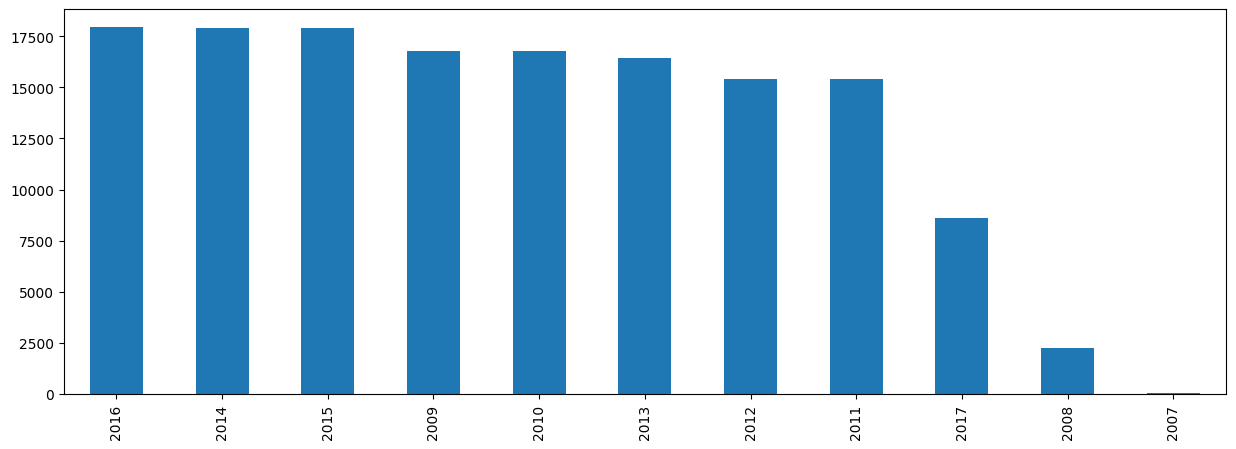

In [27]:
plt.figure(figsize=(15,5))
categorical_df['year'].value_counts().plot.bar()

<AxesSubplot: ylabel='year'>

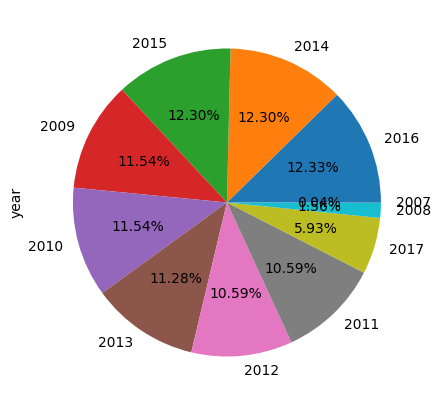

In [28]:
plt.figure(figsize=(15,5))
categorical_df['year'].value_counts().plot.pie(autopct='%0.2f%%')

##### Location

In [21]:
# Location 
print("No.of locations are : {}\nLocations :\n{}\n\n".format(len(categorical_df['Location'].unique()),sorted(categorical_df['Location'].unique())))
print("Location repetation\n{}".format(categorical_df['Location'].value_counts()))

No.of locations are : 49
Locations :
['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']


Location repetation
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           

In [22]:
categorical_df['Location'].isnull().sum()

0

<AxesSubplot: >

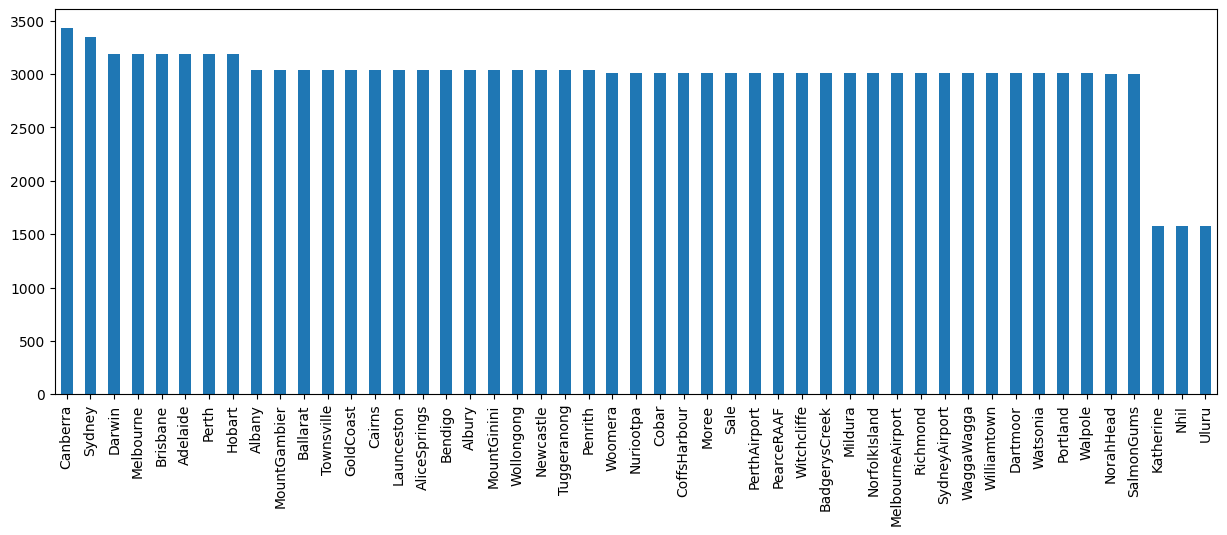

In [23]:
plt.figure(figsize=(15,5))
categorical_df['Location'].value_counts().plot.bar()

In [24]:
print("Percentage of ecah location in data")
categorical_df['Location'].value_counts()/len(categorical_df['Location']) *100

Percentage of ecah location in data


Canberra            2.362161
Sydney              2.298914
Darwin              2.195105
Melbourne           2.195105
Brisbane            2.195105
Adelaide            2.195105
Perth               2.195105
Hobart              2.195105
Albany              2.089922
MountGambier        2.089922
Ballarat            2.089922
Townsville          2.089922
GoldCoast           2.089922
Cairns              2.089922
Launceston          2.089922
AliceSprings        2.089922
Bendigo             2.089922
Albury              2.089922
MountGinini         2.089922
Wollongong          2.089922
Newcastle           2.089234
Tuggeranong         2.089234
Penrith             2.089234
Woomera             2.068610
Nuriootpa           2.068610
Cobar               2.068610
CoffsHarbour        2.068610
Moree               2.068610
Sale                2.068610
PerthAirport        2.068610
PearceRAAF          2.068610
Witchcliffe         2.068610
BadgerysCreek       2.068610
Mildura             2.068610
NorfolkIsland 

In [30]:
le = LabelEncoder()
label = le.fit_transform(categorical_df['RainTomorrow'])
categorical_df["RainTomorrow_labeled"] = label

In [31]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'No': 0, 'Yes': 1, nan: 2}


In [32]:
categorical_df.head(10)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,day,month,year,RainTomorrow_labeled
0,Albury,W,W,WNW,No,No,1,12,2008,0
1,Albury,WNW,NNW,WSW,No,No,2,12,2008,0
2,Albury,WSW,W,WSW,No,No,3,12,2008,0
3,Albury,NE,SE,E,No,No,4,12,2008,0
4,Albury,W,ENE,NW,No,No,5,12,2008,0
5,Albury,WNW,W,W,No,No,6,12,2008,0
6,Albury,W,SW,W,No,No,7,12,2008,0
7,Albury,W,SSE,W,No,No,8,12,2008,0
8,Albury,NNW,SE,NW,No,Yes,9,12,2008,1
9,Albury,W,S,SSE,Yes,No,10,12,2008,0


In [33]:
def bivariate_analysis(x):
    tempdf = categorical_df.copy()
#     my_labels1 = {0:'Not Null', 1:'Null'}
#     my_labels2 = {0:'No', 1:'Yes', 2:'nan'}
    my_labels1 = ['Not null', 'Null']
    my_labels2 = ['No','Yes', 'nan']
     
    for feature in x:
        # feature name
        text = fontstyle.apply(feature, 'bold/Italic/red/YELLOW_BG')
        print(text)
        
        # find unique values
        print("No.of unique values in {} are : {}\nvalues :\n{}\n".format(feature,len(categorical_df[feature].unique()),categorical_df[feature].unique()))
        print("Values repetation\n{}".format(categorical_df[feature].value_counts()))
        categorical_df[feature].value_counts().plot.bar()
        plt.show()
        categorical_df[feature].value_counts().plot.pie(autopct='%0.2f%%')
        plt.show()
        #null values analysis
        print("\n Null values in {} are : {}".format(feature,categorical_df[feature].isnull().sum()))
        print("percentage of null values : {}".format(categorical_df[feature].isnull().sum()/len(categorical_df[feature]) * 100))
        tempdf[feature]= np.where(tempdf[feature].isnull(),1,0)
        tempdf[feature].value_counts().plot.pie(autopct='%0.2f%%', labels = my_labels1, colors = ['green', 'red'])
        plt.show()
        #effect of null values on target feature "RainTomorrow"
        nullvalues  = tempdf.loc[tempdf[feature] == 1]
        print("Effect of null values over target")
        nullvalues.groupby('RainTomorrow_labeled')[feature].count().plot.pie(autopct='%0.2f%%', labels = my_labels2, colors = ['blue', 'green', 'red'])
        plt.show()

WindGustDir
No.of unique values in WindGustDir are : 17
values :
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']

Values repetation
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64


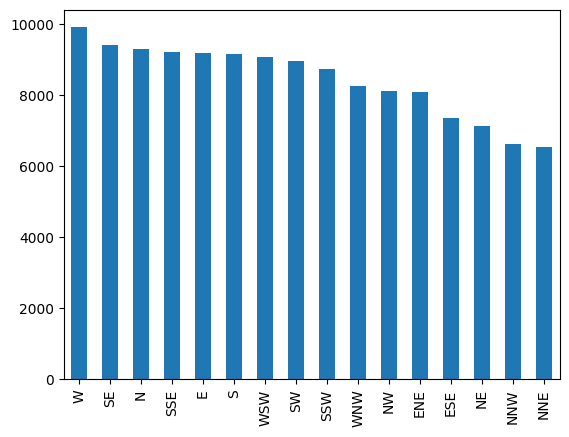

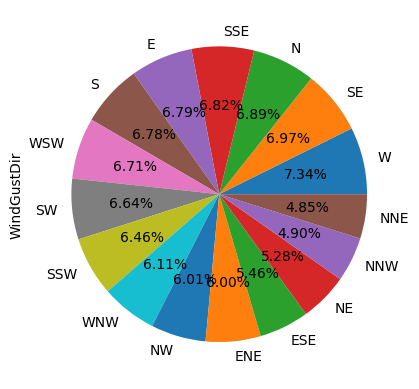


 Null values in WindGustDir are : 10326
percentage of null values : 7.098858792795271


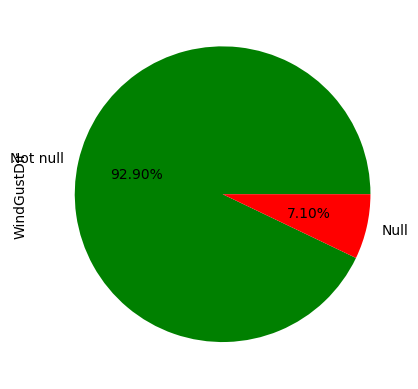

Effect of null values over target


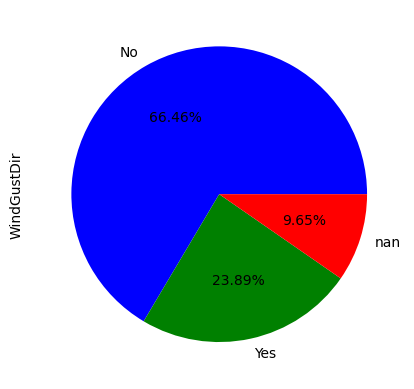

WindDir9am
No.of unique values in WindDir9am are : 17
values :
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']

Values repetation
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64


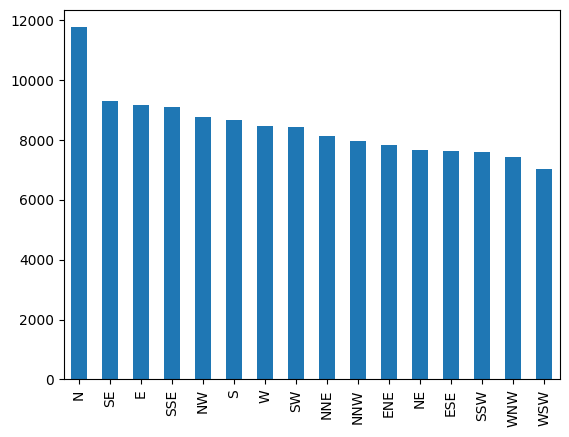

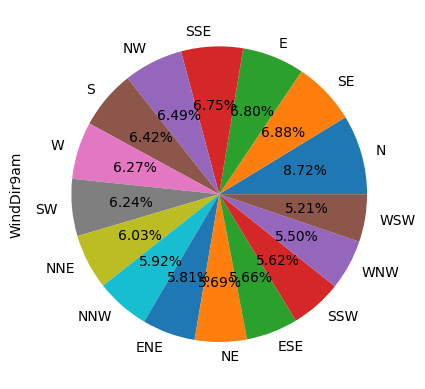


 Null values in WindDir9am are : 10566
percentage of null values : 7.263852605527293


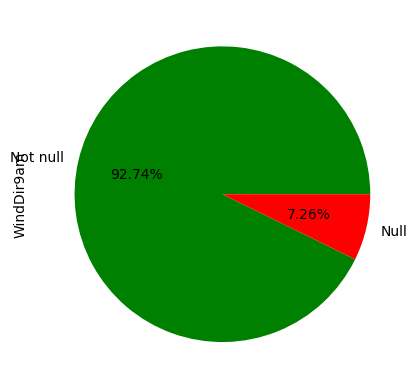

Effect of null values over target


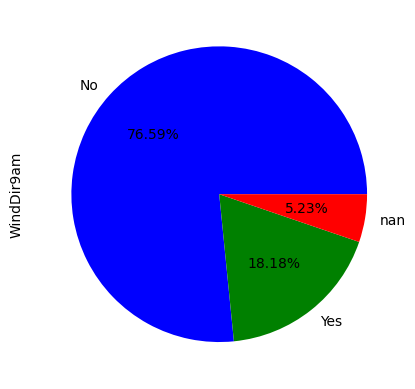

WindDir3pm
No.of unique values in WindDir3pm are : 17
values :
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']

Values repetation
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64


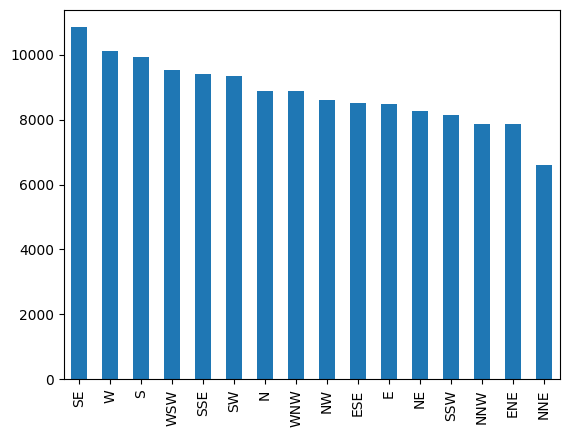

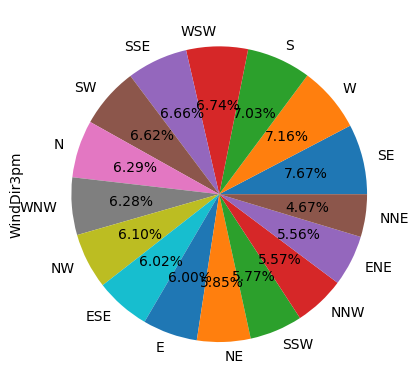


 Null values in WindDir3pm are : 4228
percentage of null values : 2.906641000962464


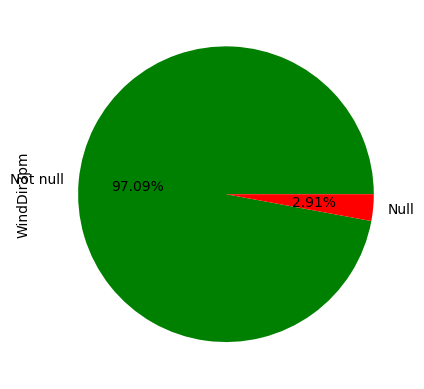

Effect of null values over target


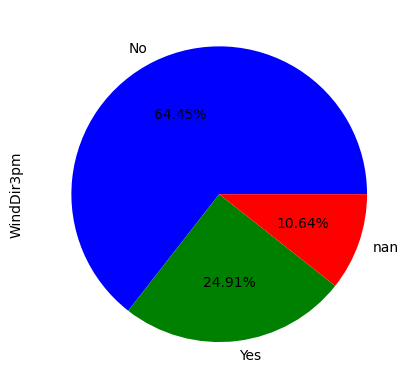

RainToday
No.of unique values in RainToday are : 3
values :
['No' 'Yes' nan]

Values repetation
No     110319
Yes     31880
Name: RainToday, dtype: int64


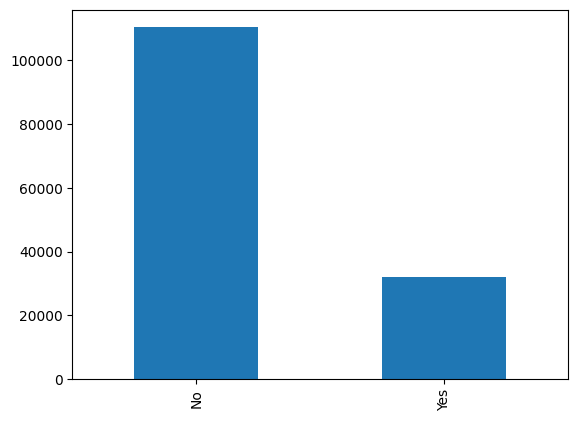

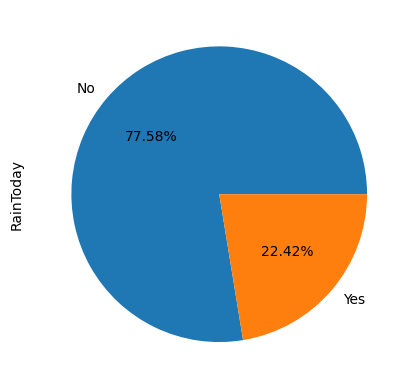


 Null values in RainToday are : 3261
percentage of null values : 2.2418534304963567


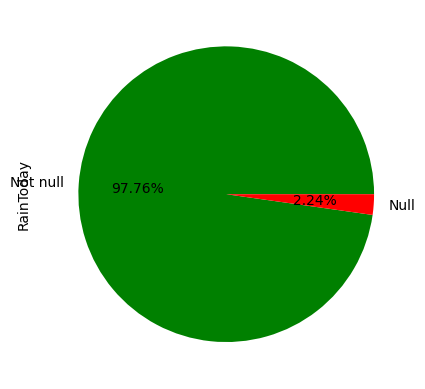

Effect of null values over target


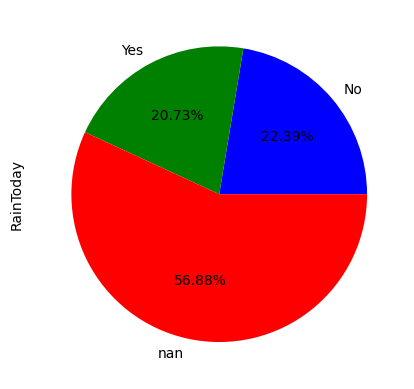

In [34]:
variables = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
bivariate_analysis(variables)

### Numerical features analysis

- Discrete featrues analysis
- Contnoius features analysis

### Discrete featrues

In [35]:
print(numerical_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [36]:
numerical_df = df[numerical_features]

In [37]:
discrete_features = [feature for feature in numerical_df.columns if len(numerical_df[feature].unique())<25]
print("No:of discrete features are:",len(discrete_features),"\n")
discrete_features

No:of discrete features are: 2 



['Cloud9am', 'Cloud3pm']

In [38]:
for feature in discrete_features:
    print("{} --- null values --- {} --- {}%".format(feature, numerical_df[feature].isnull().sum(), np.round(numerical_df[feature].isnull().mean() * 100,4)))

Cloud9am --- null values --- 55888 --- 38.4216%
Cloud3pm --- null values --- 59358 --- 40.8071%


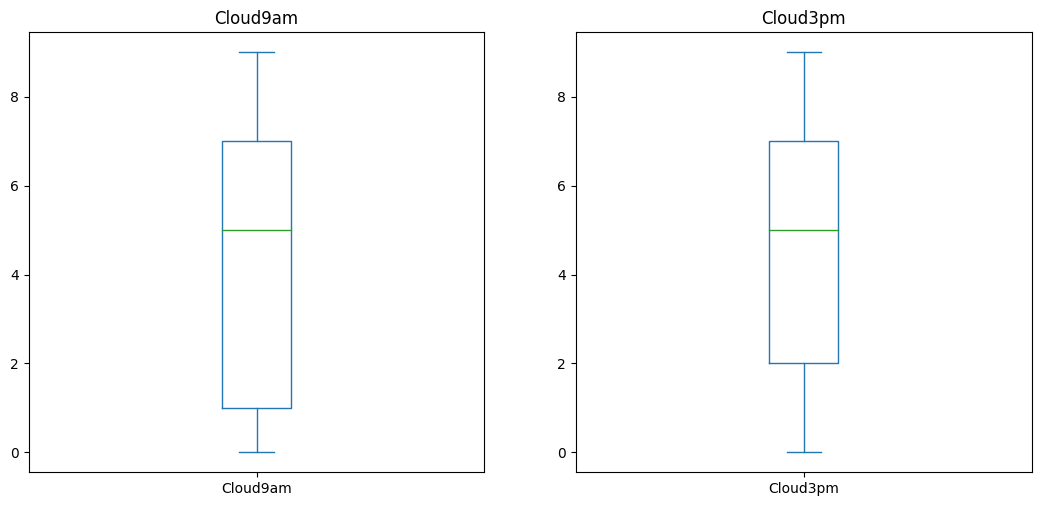

In [39]:
# finding outliers
plt.figure(figsize=(20,40))

for val in enumerate(discrete_features):
    plt.subplot(6,3, val[0]+1)
    numerical_df[val[1]].plot.box()
    plt.title(val[1])

### Contnoius features

In [40]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("No:of continous features are:",len(continous_features),"\n")
continous_features

No:of continous features are: 14 



['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [41]:
for feature in continous_features:
    print("{} --- null values --- {} --- {}%".format(feature, numerical_df[feature].isnull().sum(), np.round(numerical_df[feature].isnull().mean() * 100,4)))

MinTemp --- null values --- 1485 --- 1.0209%
MaxTemp --- null values --- 1261 --- 0.8669%
Rainfall --- null values --- 3261 --- 2.2419%
Evaporation --- null values --- 62790 --- 43.1665%
Sunshine --- null values --- 69835 --- 48.0098%
WindGustSpeed --- null values --- 10263 --- 7.0555%
WindSpeed9am --- null values --- 1767 --- 1.2148%
WindSpeed3pm --- null values --- 3062 --- 2.105%
Humidity9am --- null values --- 2654 --- 1.8246%
Humidity3pm --- null values --- 4507 --- 3.0984%
Pressure9am --- null values --- 15065 --- 10.3568%
Pressure3pm --- null values --- 15028 --- 10.3314%
Temp9am --- null values --- 1767 --- 1.2148%
Temp3pm --- null values --- 3609 --- 2.4811%


In [42]:
numerical_df['RainTomorrow_labeled'] = label
def nulls(x) :
    my_labels1 = ['Not null', 'Null']
    my_labels2 = ['No','Yes', 'nan']
    tempdf = numerical_df.copy()
    for feature in x:
        tempdf[feature]= np.where(tempdf[feature].isnull(),1,0)
        tempdf[feature].value_counts().plot.pie(autopct='%0.2f%%', labels = my_labels1, colors = ['green', 'red'])
        plt.show()
        #effect of null values on target feature "RainTomorrow"
        nullvalues  = tempdf.loc[tempdf[feature] == 1]
        print("Effect of null values over target")
        nullvalues.groupby('RainTomorrow_labeled')[feature].count().plot.pie(autopct='%0.2f%%', labels = my_labels2, colors = ['blue', 'green', 'red'])
        plt.show()

In [43]:
numerical_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_labeled
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


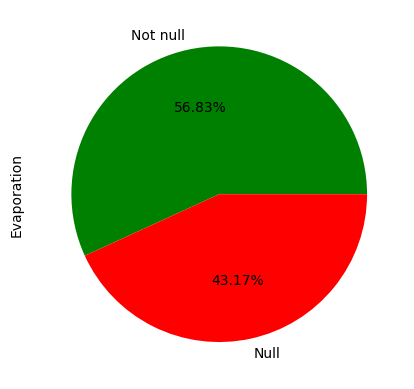

Effect of null values over target


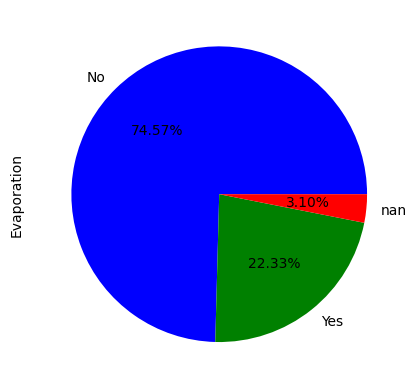

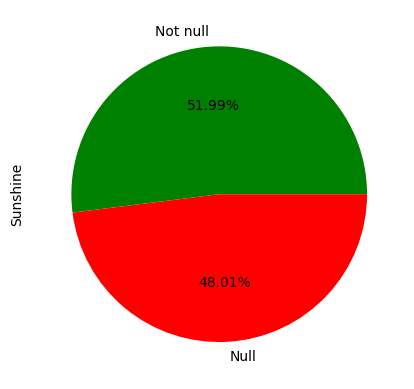

Effect of null values over target


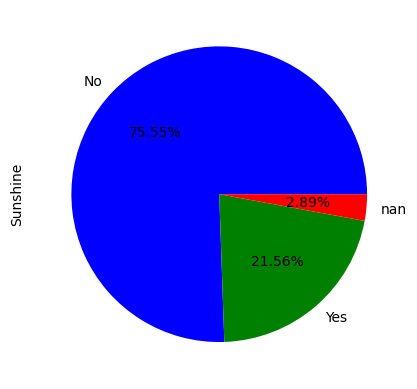

In [44]:
# I am doing this only for the features which has high NAN values
var = ['Evaporation', 'Sunshine' ] 
nulls(var)

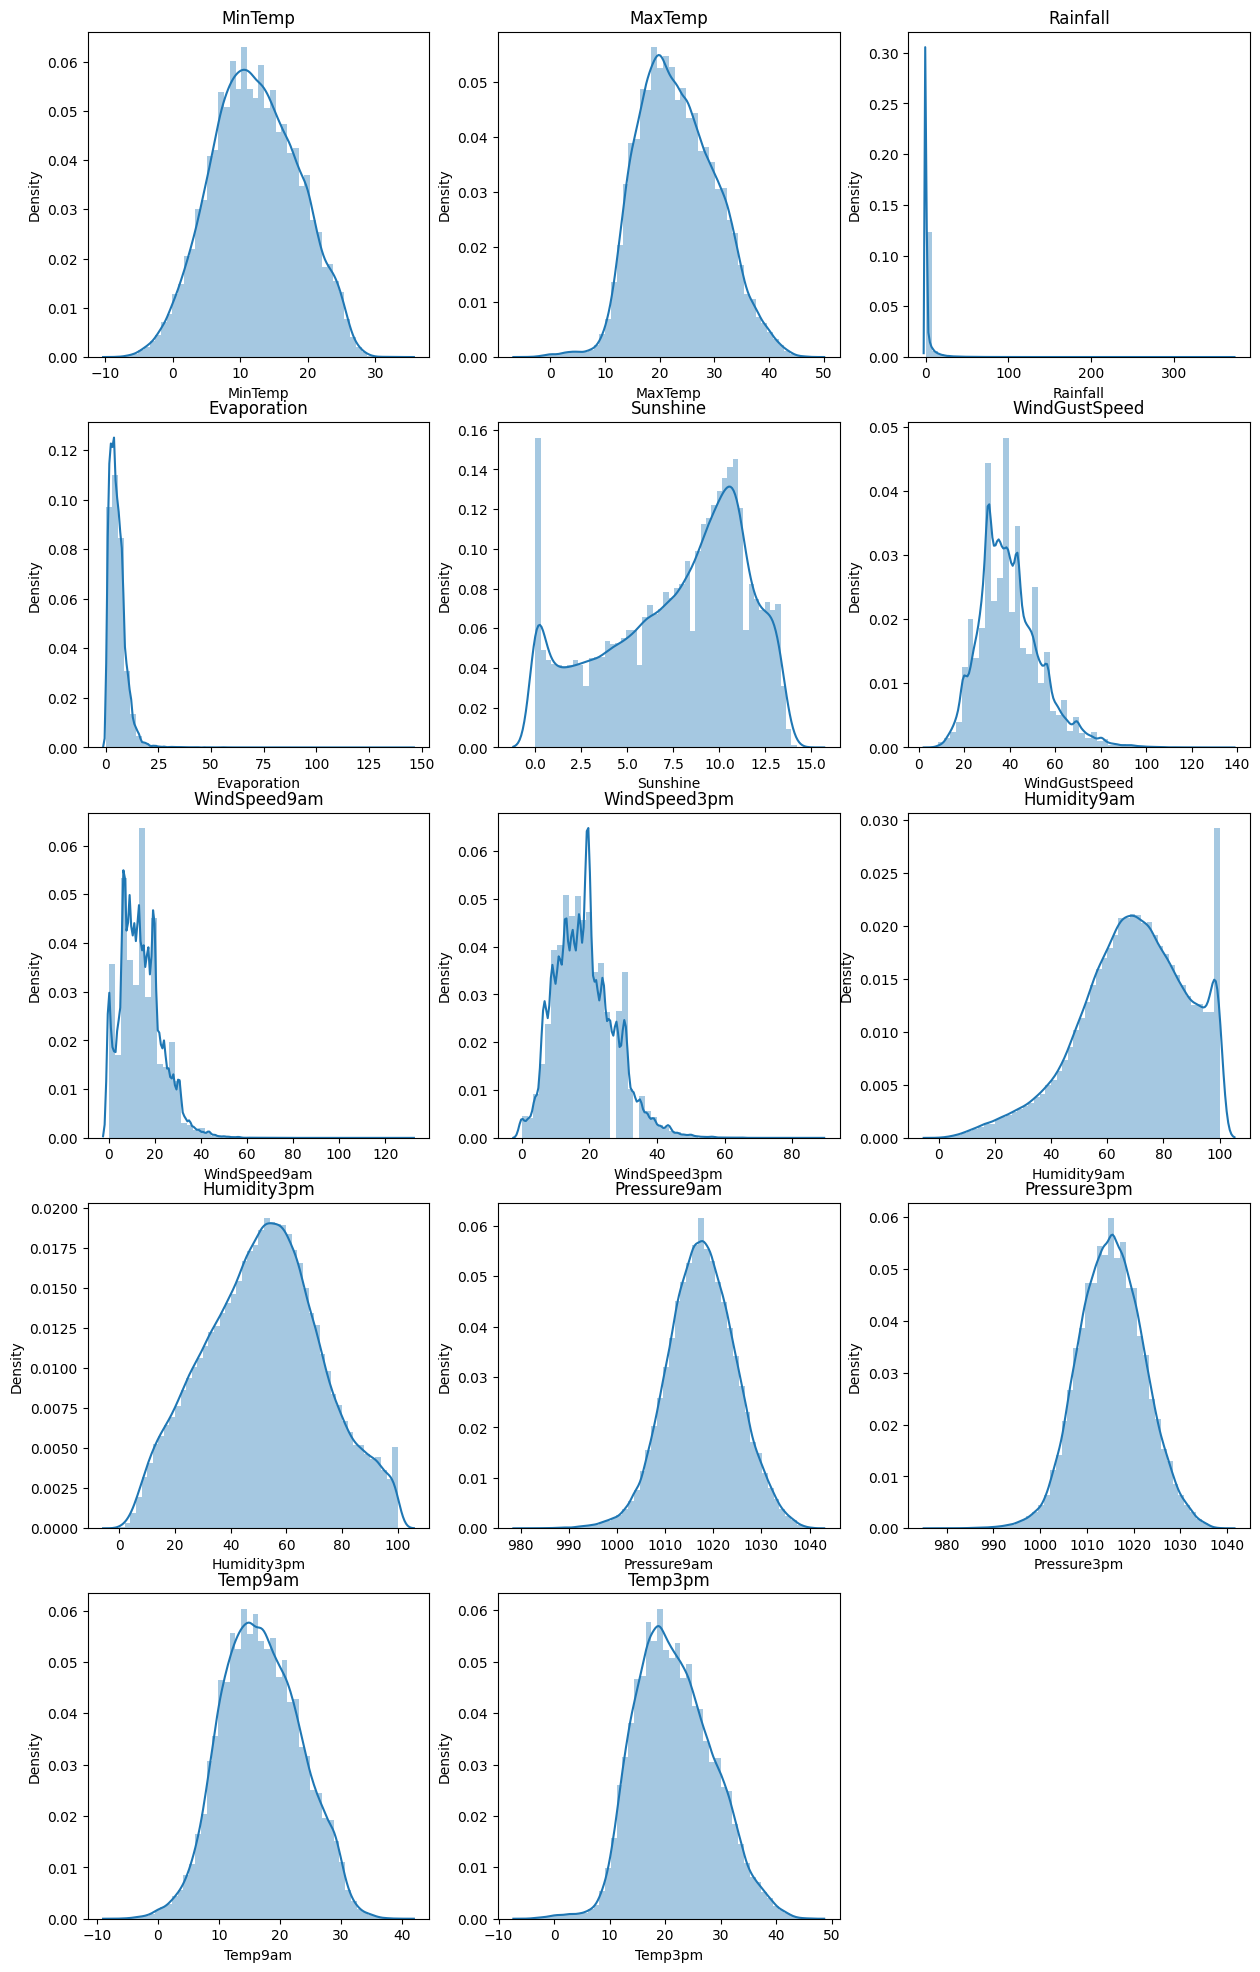

In [50]:
# Check distribution
plt.figure(figsize=(15,60))
for feature in enumerate(continous_features):
    plt.subplot(12,3,feature[0]+1)
    sns.distplot(numerical_df[feature[1]])
    plt.xlabel(feature[1])
    plt.title(feature[1])

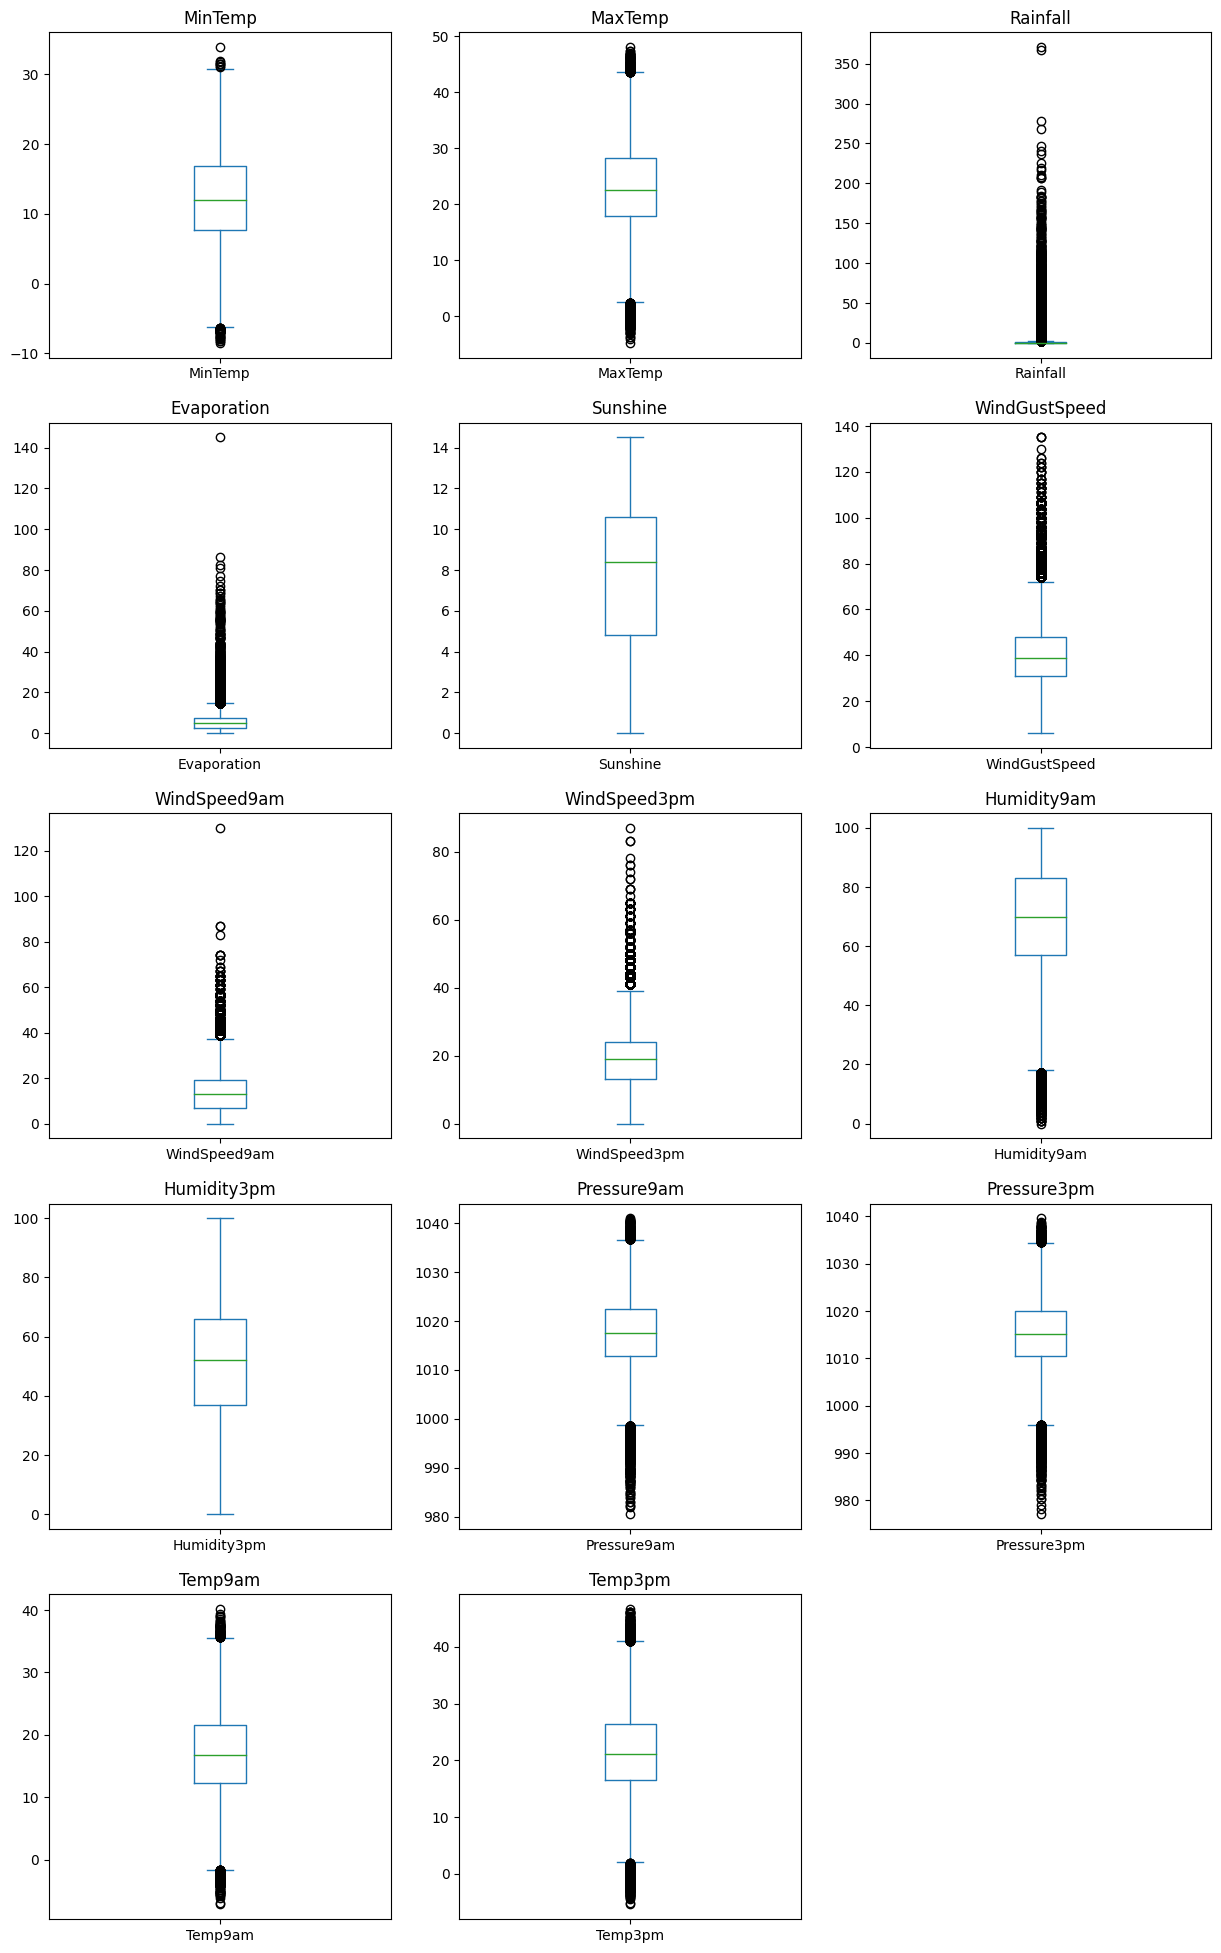

In [51]:
# Check outliers
plt.figure(figsize=(15,60))

for val in enumerate(continous_features) :
        plt.subplot(12,3,val[0]+1)
        numerical_df[val[1]].plot.box()
        plt.title(val[1])

## Feature engineering

In [52]:
df111 = df.copy()

In [54]:
df111.drop("Date", axis = 1, inplace=True)
df111.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


#### Categorical features 
- Based on the above analysis feature engineering is done

In [55]:
# replace null values for categorical features
df111['WindGustDir'].fillna("SE", inplace=True)
df111['WindDir9am'].fillna("SW", inplace=True)
df111['WindDir3pm'].fillna("WNW", inplace=True)
df111['RainToday'].fillna("No", inplace=True)
df111['RainTomorrow'].fillna("No", inplace=True)

In [56]:
df111[['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Encoding

In [57]:
maps = []
encoder = LabelEncoder()
def encode(features):
    for feature in features:
        label = encoder.fit_transform(df111[feature])
        df111.drop(feature, axis=1, inplace=True)
        df111[feature] = label
        mappings = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        maps.append(mappings)

In [58]:
features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
encode(features)

In [59]:
print(maps)

[{'Adelaide': 0, 'Albany': 1, 'Albury': 2, 'AliceSprings': 3, 'BadgerysCreek': 4, 'Ballarat': 5, 'Bendigo': 6, 'Brisbane': 7, 'Cairns': 8, 'Canberra': 9, 'Cobar': 10, 'CoffsHarbour': 11, 'Dartmoor': 12, 'Darwin': 13, 'GoldCoast': 14, 'Hobart': 15, 'Katherine': 16, 'Launceston': 17, 'Melbourne': 18, 'MelbourneAirport': 19, 'Mildura': 20, 'Moree': 21, 'MountGambier': 22, 'MountGinini': 23, 'Newcastle': 24, 'Nhil': 25, 'NorahHead': 26, 'NorfolkIsland': 27, 'Nuriootpa': 28, 'PearceRAAF': 29, 'Penrith': 30, 'Perth': 31, 'PerthAirport': 32, 'Portland': 33, 'Richmond': 34, 'Sale': 35, 'SalmonGums': 36, 'Sydney': 37, 'SydneyAirport': 38, 'Townsville': 39, 'Tuggeranong': 40, 'Uluru': 41, 'WaggaWagga': 42, 'Walpole': 43, 'Watsonia': 44, 'Williamtown': 45, 'Witchcliffe': 46, 'Wollongong': 47, 'Woomera': 48}, {'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3, 'NE': 4, 'NNE': 5, 'NNW': 6, 'NW': 7, 'S': 8, 'SE': 9, 'SSE': 10, 'SSW': 11, 'SW': 12, 'W': 13, 'WNW': 14, 'WSW': 15}, {'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3

In [60]:
df111.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2,13,13,14,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2,14,6,15,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2,15,13,15,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2,4,9,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2,13,1,7,0,0


### Numerical features

#### Discrete values

In [61]:
# Discrete values replacing null
Cloud9am, Cloud3pm=df111[['Cloud9am', 'Cloud3pm']].median()

In [62]:
df111.fillna({'Cloud9am':Cloud9am, 'Cloud3pm':Cloud3pm}, inplace = True)

In [63]:
df111[['Cloud9am', 'Cloud3pm']].isnull().sum()

Cloud9am    0
Cloud3pm    0
dtype: int64

#### Continous values

In [ ]:
#  'MinTemp',              -- 1. Null value replacement, 2. outilers treatment
#  'MaxTemp',


#  'Humidity3pm',          -- 1. Null value replacement

#  'Temp9am',
#  'Temp3pm'               -- 1. Null value replacement, 2. outilers treatment

#  'Pressure9am',
#  'Pressure3pm',          --  1. Null value replacement, 2.scaling the values, 3. outilers treatment


#  'Rainfall',
#  'Evaporation',
#  'Sunshine',
#  'WindGustSpeed',        --  1. Null value treatment, 2. outilers treatment
#  'WindSpeed9am',     
#  'WindSpeed3pm',
#  'Humidity9am',


In [64]:
df111.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,2,13,13,14,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,2,14,6,15,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,2,15,13,15,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,2,4,9,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2,13,1,7,0,0
5,14.6,29.7,0.2,NaN,NaN,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,2,14,13,13,0,0
6,14.3,25.0,0.0,NaN,NaN,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,2,13,12,13,0,0
7,7.7,26.7,0.0,NaN,NaN,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,2,13,10,13,0,0
8,9.7,31.9,0.0,NaN,NaN,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,2,6,9,7,0,1
9,13.1,30.1,1.4,NaN,NaN,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,2,13,8,10,1,0


In [65]:
# 'MinTemp',      
#  MaxTemp',

# Null values
MinTemp, MaxTemp = df111[['MinTemp', 'MaxTemp']].median()
print("MinTemp median : {}\nMaxTemp median : {}".format(MinTemp, MaxTemp))

MinTemp median : 12.0
MaxTemp median : 22.6


In [66]:
df111.fillna({'MinTemp':MinTemp, 'MaxTemp':MaxTemp}, inplace = True)

In [67]:
df111[['MinTemp', 'MaxTemp']].isnull().sum()

MinTemp    0
MaxTemp    0
dtype: int64

In [68]:
# outilers treatment
IQR = df111.MinTemp.quantile(0.75) - df111.MinTemp.quantile(0.25)
Lower_fence = df111.MinTemp.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.MinTemp.quantile(0.75) + (IQR * 1.5)
print('MinTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.MaxTemp.quantile(0.75) - df111.MaxTemp.quantile(0.25)
Lower_fence = df111.MaxTemp.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.MaxTemp.quantile(0.75) + (IQR * 1.5)
print('MaxTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))    

MinTemp outliers are values < -5.950000000000002 or > 30.450000000000003
MaxTemp outliers are values < 2.700000000000001 or > 43.5


In [69]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])
def min_value(df3, variable, bottom):
    return np.where(df3[variable]<bottom, bottom, df3[variable])

In [70]:
df111['MinTemp'] = max_value(df111, 'MinTemp', 30.45)
df111['MinTemp'] = min_value(df111, 'MinTemp', -5.95)
df111['MaxTemp'] = max_value(df111, 'MaxTemp', 43.5)
df111['MaxTemp'] = min_value(df111, 'MaxTemp', 2.70)

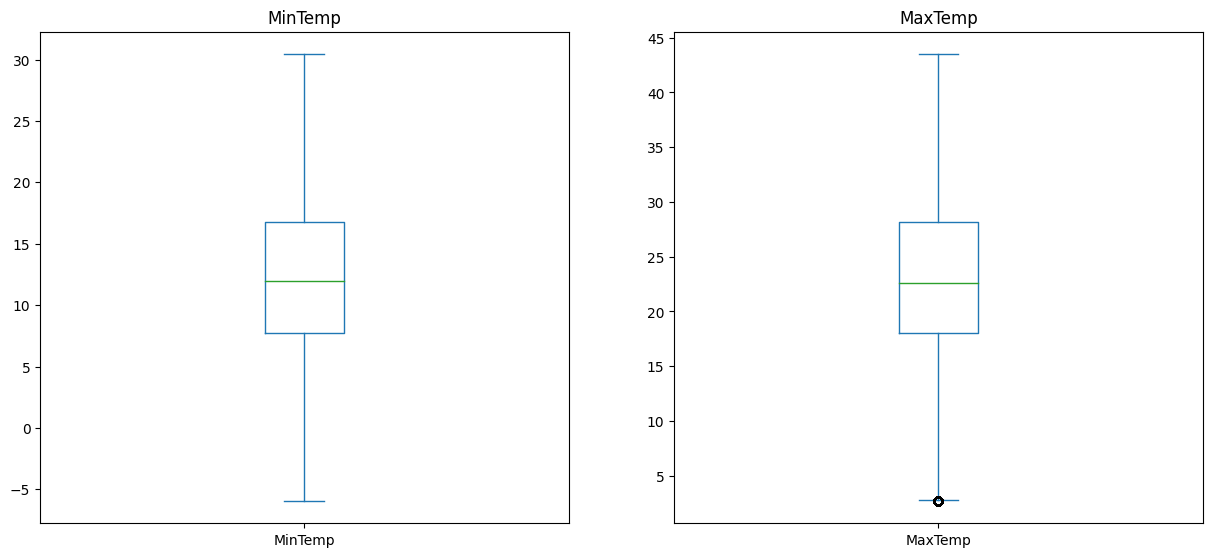

In [71]:
plt.figure(figsize=(15,60))
for val in enumerate(['MinTemp', 'MaxTemp']) :
        plt.subplot(8,2,val[0]+1)
        df111[val[1]].plot.box()
        plt.title(val[1])

In [72]:
#  'Temp9am',
#  'Temp3pm'           

#  Null value 
Temp9am, Temp3pm = df111[['Temp9am', 'Temp3pm']].median()
print("Temp9am median : {}\nTemp3pm  median : {}".format(Temp9am, Temp3pm))

Temp9am median : 16.7
Temp3pm  median : 21.1


In [73]:
df111.fillna({'Temp9am':Temp9am, 'Temp3pm':Temp3pm}, inplace = True)

In [74]:
df111[['Temp9am', 'Temp3pm']].isnull().sum()

Temp9am    0
Temp3pm    0
dtype: int64

In [75]:
#  outilers treatment

IQR = df111.Temp9am.quantile(0.75) - df111.Temp9am.quantile(0.25)
Lower_fence = df111.Temp9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.Temp9am.quantile(0.75) + (IQR * 1.5)
print('Temp9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.Temp3pm.quantile(0.75) - df111.Temp3pm.quantile(0.25)
Lower_fence = df111.Temp3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.Temp3pm.quantile(0.75) + (IQR * 1.5)
print('Temp3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
    

Temp9am outliers are values < -1.4999999999999982 or > 35.3
Temp3pm outliers are values < 2.4499999999999993 or > 40.45


In [76]:
df111['Temp9am'] = max_value(df111, 'Temp9am', 35.3)
df111['Temp9am'] = min_value(df111, 'Temp9am', -1.49)
df111['Temp3pm'] = max_value(df111, 'Temp3pm', 40.45)
df111['Temp3pm'] = min_value(df111, 'Temp3pm', 2.44)

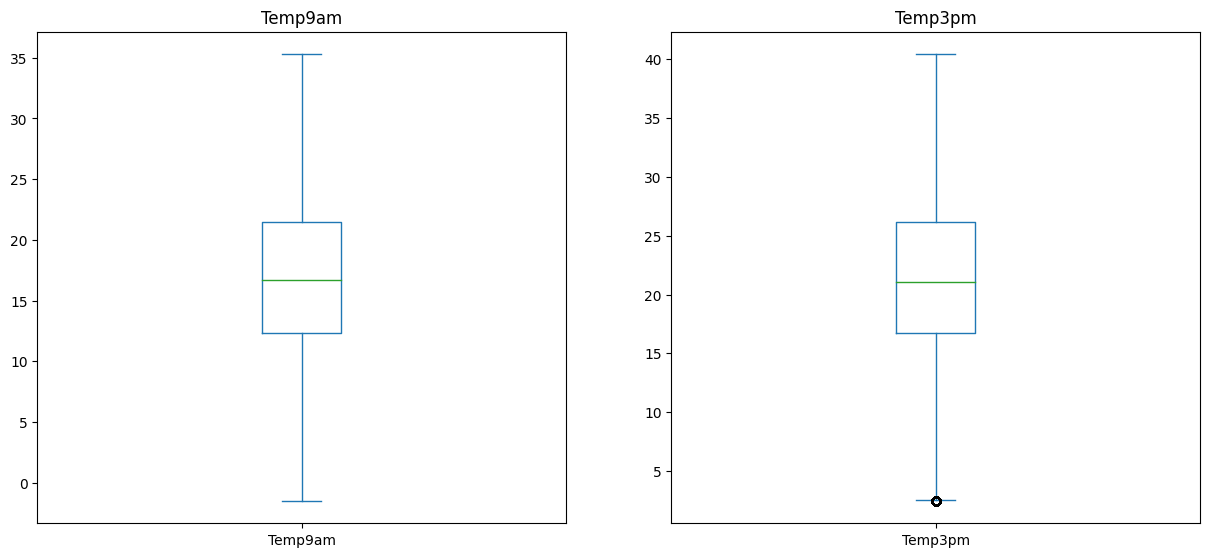

In [77]:
plt.figure(figsize=(15,60))
for val in enumerate(['Temp9am', 'Temp3pm']) :
        plt.subplot(8,2,val[0]+1)
        df111[val[1]].plot.box()
        plt.title(val[1])

In [78]:
#  'Humidity3pm'    

#  Null value treatment
Humidity3pm = df111['Humidity3pm'].median()
print("Humidity3pm median : {}".format(Humidity3pm))

df111.fillna({'Humidity3pm':Humidity3pm}, inplace = True)

df111['Humidity3pm'].isnull().sum()

Humidity3pm median : 52.0


0

In [79]:
#  'Pressure9am',
#  'Pressure3pm',      

# Null value treatment
Pressure9am, Pressure3pm = df111[['Pressure9am', 'Pressure3pm']].median()
print("Pressure9am median : {}\nPressure3pm  median : {}".format(Pressure9am, Pressure3pm))

df111.fillna({'Pressure9am':Pressure9am, 'Pressure3pm':Pressure3pm}, inplace = True)

df111[['Pressure9am', 'Pressure3pm']].isnull().sum()

Pressure9am median : 1017.6
Pressure3pm  median : 1015.2


Pressure9am    0
Pressure3pm    0
dtype: int64

In [80]:
#  outilers treatment
IQR = df111.Pressure9am.quantile(0.75) - df111.Pressure9am.quantile(0.25)
Lower_fence = df111.Pressure9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.Pressure9am.quantile(0.75) + (IQR * 1.5)
print('Pressure9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.Pressure3pm.quantile(0.75) - df111.Pressure3pm.quantile(0.25)
Lower_fence = df111.Pressure3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.Pressure3pm.quantile(0.75) + (IQR * 1.5)
print('Pressure3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Pressure9am outliers are values < 1001.0500000000001 or > 1034.25
Pressure3pm outliers are values < 998.6500000000001 or > 1031.85


In [81]:
df111['Pressure9am'] = max_value(df111, 'Pressure9am', 1034.25)
df111['Pressure9am'] = min_value(df111, 'Pressure9am', 1001.05)

df111['Pressure3pm'] = max_value(df111, 'Pressure3pm', 1031.85)
df111['Pressure3pm'] = min_value(df111, 'Pressure3pm', 998.65)

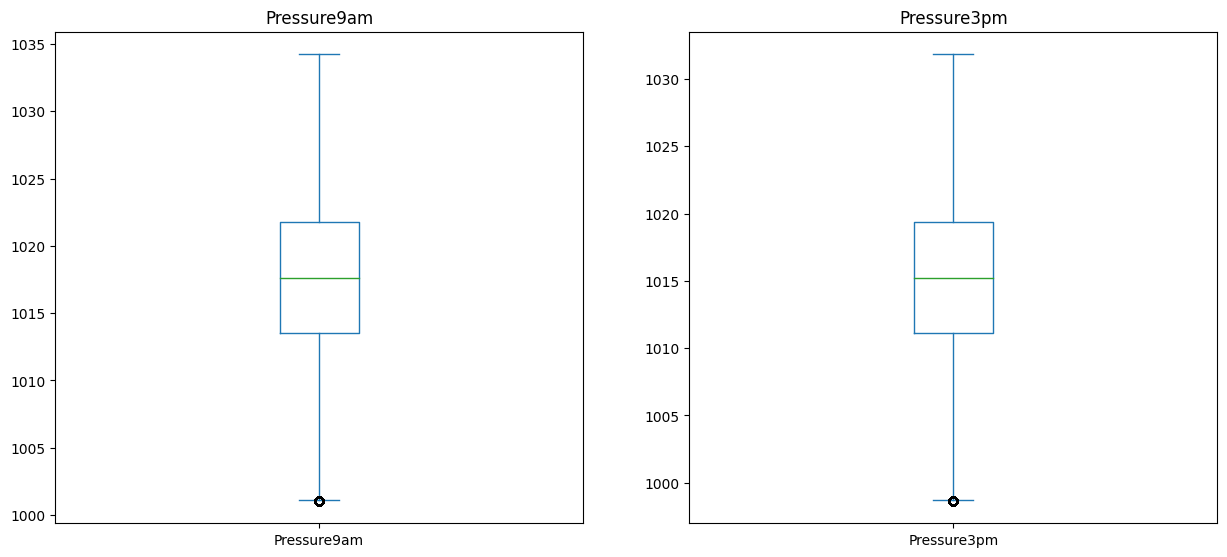

In [82]:
plt.figure(figsize=(15,60))
for val in enumerate(['Pressure9am', 'Pressure3pm']) :
        plt.subplot(8,2,val[0]+1)
        df111[val[1]].plot.box()
        plt.title(val[1])

In [83]:
# Normalization

mean_Pressure9am = df111['Pressure9am'].mean()
std_Pressure9am = df111['Pressure9am'].std()
max_Pressure9am = df111['Pressure9am'].max()

mean_Pressure3pm = df111['Pressure3pm'].mean()
std_Pressure3pm = df111['Pressure3pm'].std()
max_Pressure3pm = df111['Pressure3pm'].max()

print("mean_Pressure9am :{}\nstd_Pressure9am :{}\nmax_Pressure9am :{}\n\nmean_Pressure3pm :{}\nstd_Pressure3pm :{}\nmax_Pressure3pm : {} ".format(mean_Pressure9am, std_Pressure9am, max_Pressure9am, mean_Pressure3pm, std_Pressure3pm, max_Pressure3pm))

mean_Pressure9am :1017.6717063110134
std_Pressure9am :6.568469061543417
max_Pressure9am :1034.25

mean_Pressure3pm :1015.2685369998626
std_Pressure3pm :6.528909412157161
max_Pressure3pm : 1031.85 


In [84]:
df111['Pressure9am'] = df111['Pressure9am']/max_Pressure9am
df111['Pressure3pm'] = df111['Pressure3pm']/max_Pressure3pm

In [85]:
df111['Pressure9am'] = np.round(df111['Pressure9am'], decimals = 3) 
df111['Pressure3pm'] = np.round(df111['Pressure3pm'], decimals = 3) 

In [86]:
df111.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,0.974,0.976,8.0,5.0,16.9,21.8,2,13,13,14,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,0.977,0.977,5.0,5.0,17.2,24.3,2,14,6,15,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,0.974,0.978,5.0,2.0,21.0,23.2,2,15,13,15,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,0.984,0.982,5.0,5.0,18.1,26.5,2,4,9,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,0.977,0.975,7.0,8.0,17.8,29.7,2,13,1,7,0,0
5,14.6,29.7,0.2,NaN,NaN,56.0,19.0,24.0,55.0,23.0,0.976,0.974,5.0,5.0,20.6,28.9,2,14,13,13,0,0
6,14.3,25.0,0.0,NaN,NaN,50.0,20.0,24.0,49.0,19.0,0.976,0.977,1.0,5.0,18.1,24.6,2,13,12,13,0,0
7,7.7,26.7,0.0,NaN,NaN,35.0,6.0,17.0,48.0,19.0,0.980,0.979,5.0,5.0,16.3,25.5,2,13,10,13,0,0
8,9.7,31.9,0.0,NaN,NaN,80.0,7.0,28.0,42.0,9.0,0.975,0.973,5.0,5.0,18.3,30.2,2,6,9,7,0,1
9,13.1,30.1,1.4,NaN,NaN,28.0,15.0,11.0,58.0,27.0,0.974,0.975,5.0,5.0,20.1,28.2,2,13,8,10,1,0


In [87]:
#  'Rainfall',
#  'Evaporation',
#  'Sunshine',
#  'WindGustSpeed',        
#  'WindSpeed9am',     
#  'WindSpeed3pm',
#  'Humidity9am',

features = ['Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',     
 'WindSpeed9am',     
 'WindSpeed3pm',
 'Humidity9am']
for feature in features:
    median = df111[feature].median()
    df111[feature].fillna(median, inplace = True)

In [88]:
df111.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

In [89]:
# outliers
features = ['Rainfall_log',
 'Evaporation_log',
 'Sunshine_log',
 'WindGustSpeed_log',     
 'WindSpeed9am_log',     
 'WindSpeed3pm_log',
 'Humidity9am_log']

IQR = df111.Rainfall.quantile(0.75) - df111.Rainfall.quantile(0.25)
Lower_fence = df111.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.Rainfall.quantile(0.75) + (IQR * 1.5)
print('Rainfall_log outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.Evaporation.quantile(0.75) - df111.Evaporation.quantile(0.25)
Lower_fence = df111.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.Evaporation.quantile(0.75) + (IQR * 1.5)
print('Evaporation_log outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.Sunshine.quantile(0.75) - df111.Sunshine.quantile(0.25)
Lower_fence = df111.Sunshine.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.Sunshine.quantile(0.75) + (IQR * 1.5)
print('Sunshine_log outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.WindGustSpeed.quantile(0.75) - df111.WindGustSpeed.quantile(0.25)
Lower_fence = df111.WindGustSpeed.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.WindGustSpeed.quantile(0.75) + (IQR * 1.5)
print('WindGustSpeed_log outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.WindSpeed9am.quantile(0.75) - df111.WindSpeed9am.quantile(0.25)
Lower_fence = df111.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('WindSpeed9am_log outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.WindSpeed3pm.quantile(0.75) - df111.WindSpeed3pm.quantile(0.25)
Lower_fence = df111.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print('WindSpeed3pm_log outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df111.Humidity9am.quantile(0.75) - df111.Humidity9am.quantile(0.25)
Lower_fence = df111.Humidity9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df111.Humidity9am.quantile(0.75) + (IQR * 1.5)
print('Humidity9am_log outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall_log outliers are values < -0.8999999999999999 or > 1.5
Evaporation_log outliers are values < 2.1999999999999997 or > 7.0
Sunshine_log outliers are values < 7.449999999999999 or > 9.45
WindGustSpeed_log outliers are values < 8.5 or > 68.5
WindSpeed9am_log outliers are values < -11.0 or > 37.0
WindSpeed3pm_log outliers are values < -3.5 or > 40.5
Humidity9am_log outliers are values < 18.0 or > 122.0


In [90]:
df111['Rainfall'] = max_value(df111, 'Rainfall', 1.5)
df111['Rainfall'] = min_value(df111, 'Rainfall', -0.9)

df111['Evaporation'] = max_value(df111, 'Evaporation', 7.0)
df111['Evaporation'] = min_value(df111, 'Evaporation', 2.2)

df111['Sunshine'] = max_value(df111, 'Sunshine', 9.45)
df111['Sunshine'] = min_value(df111, 'Sunshine', 7.45)

df111['WindGustSpeed'] = max_value(df111, 'WindGustSpeed', 68.5)
df111['WindGustSpeed'] = min_value(df111, 'WindGustSpeed', 8.5)

df111['WindSpeed9am'] = max_value(df111, 'WindSpeed9am', 37.0)
df111['WindSpeed9am'] = min_value(df111, 'WindSpeed9am', -11.0)

df111['WindSpeed3pm'] = max_value(df111, 'WindSpeed3pm', 40.5)
df111['WindSpeed3pm'] = min_value(df111, 'WindSpeed3pm', -3.5)

df111['Humidity9am'] = max_value(df111, 'Humidity9am', 122.0)
df111['Humidity9am'] = min_value(df111, 'Humidity9am', 18.0)

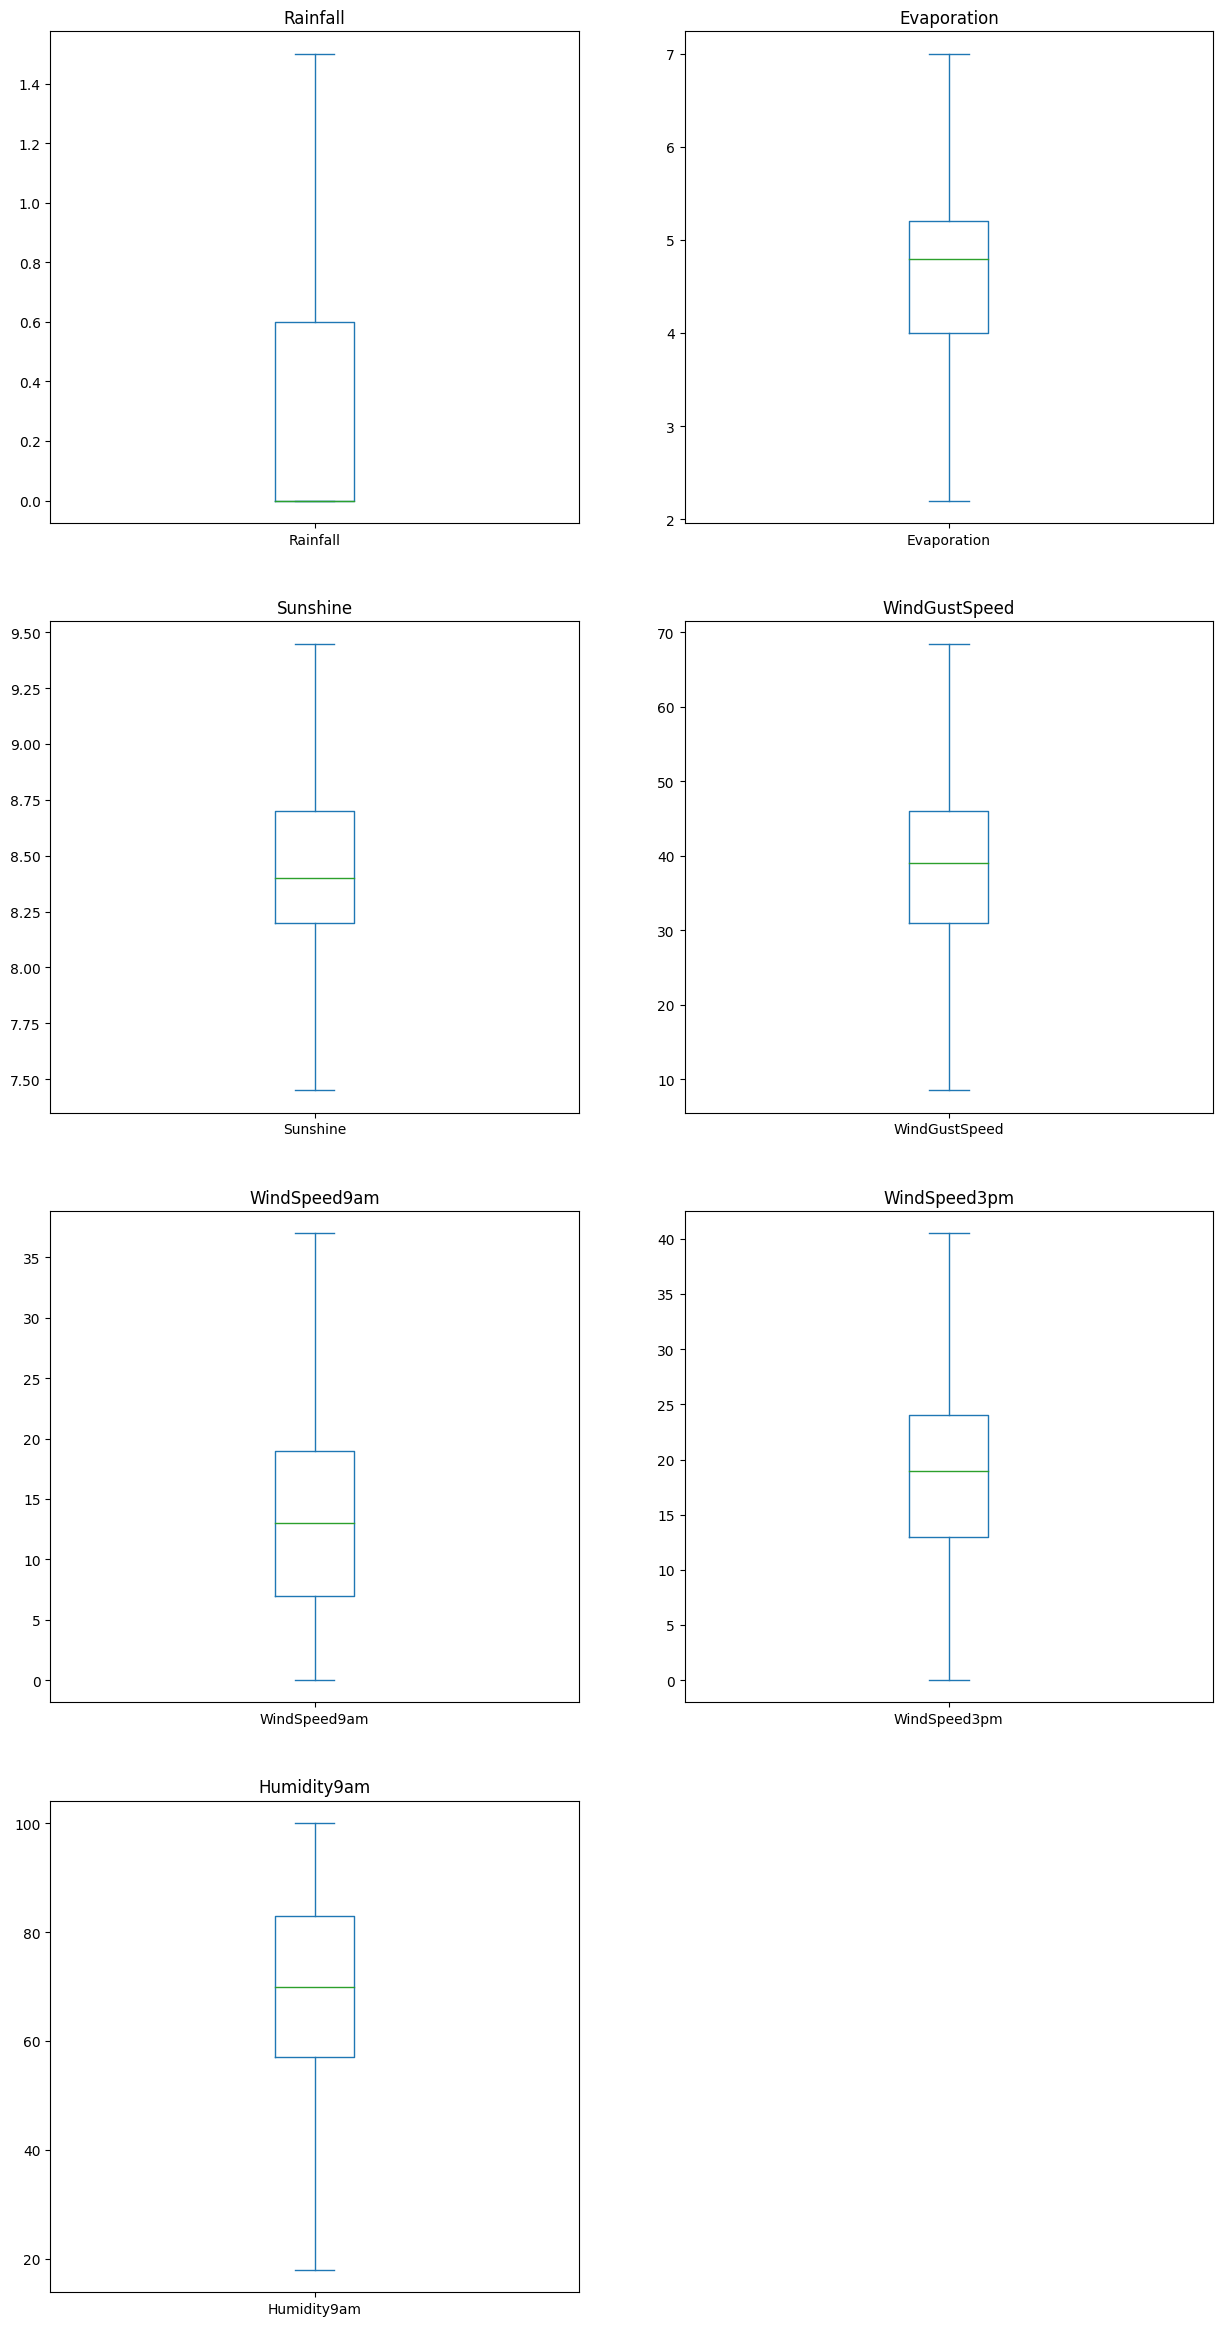

In [91]:
plt.figure(figsize=(15,60))
for val in enumerate(['Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',     
 'WindSpeed9am',     
 'WindSpeed3pm',
 'Humidity9am']) :
        plt.subplot(8,2,val[0]+1)
        df111[val[1]].plot.box()
        plt.title(val[1])

#### The data has been processed let's see the final data

In [92]:
data = df111.copy()

In [94]:
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,0.974,0.976,8.0,5.0,16.9,21.8,2,13,13,14,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,0.977,0.977,5.0,5.0,17.2,24.3,2,14,6,15,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,0.974,0.978,5.0,2.0,21.0,23.2,2,15,13,15,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,0.984,0.982,5.0,5.0,18.1,26.5,2,4,9,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,0.977,0.975,7.0,8.0,17.8,29.7,2,13,1,7,0,0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,0.976,0.974,5.0,5.0,20.6,28.9,2,14,13,13,0,0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,0.976,0.977,1.0,5.0,18.1,24.6,2,13,12,13,0,0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,0.980,0.979,5.0,5.0,16.3,25.5,2,13,10,13,0,0
8,9.7,31.9,0.0,4.8,8.4,68.5,7.0,28.0,42.0,9.0,0.975,0.973,5.0,5.0,18.3,30.2,2,6,9,7,0,1
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,0.974,0.975,5.0,5.0,20.1,28.2,2,13,8,10,1,0


In [95]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

In [96]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192336,23.219758,0.381674,4.750932,8.422820,39.64328,13.939757,18.583126,68.953025,51.553396,0.983985,0.983947,4.659755,4.709913,16.988221,21.671163,23.793524,7.809645,7.653272,7.944184,0.219167,0.219146
std,6.364499,7.067804,0.608638,1.454089,0.676532,12.17591,8.555976,8.442404,18.704151,20.471345,0.006358,0.006328,2.281490,2.106768,6.440843,6.813431,14.228687,4.505936,4.540902,4.652885,0.413683,0.413669
min,-5.950000,2.700000,0.000000,2.200000,7.450000,8.50000,0.000000,0.000000,18.000000,0.000000,0.968000,0.968000,0.000000,0.000000,-1.490000,2.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.00000,7.000000,13.000000,57.000000,37.000000,0.980000,0.980000,3.000000,4.000000,12.300000,16.700000,11.000000,4.000000,3.000000,4.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.00000,13.000000,19.000000,70.000000,52.000000,0.984000,0.984000,5.000000,5.000000,16.700000,21.100000,24.000000,9.000000,8.000000,8.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.00000,19.000000,24.000000,83.000000,65.000000,0.988000,0.988000,6.000000,6.000000,21.500000,26.200000,36.000000,11.000000,12.000000,12.000000,0.000000,0.000000
max,30.450000,43.500000,1.500000,7.000000,9.450000,68.50000,37.000000,40.500000,100.000000,100.000000,1.000000,1.000000,9.000000,9.000000,35.300000,40.450000,48.000000,15.000000,15.000000,15.000000,1.000000,1.000000


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  Location       145460 non-null  int32  
 17  WindGustDir    145460 non-nul

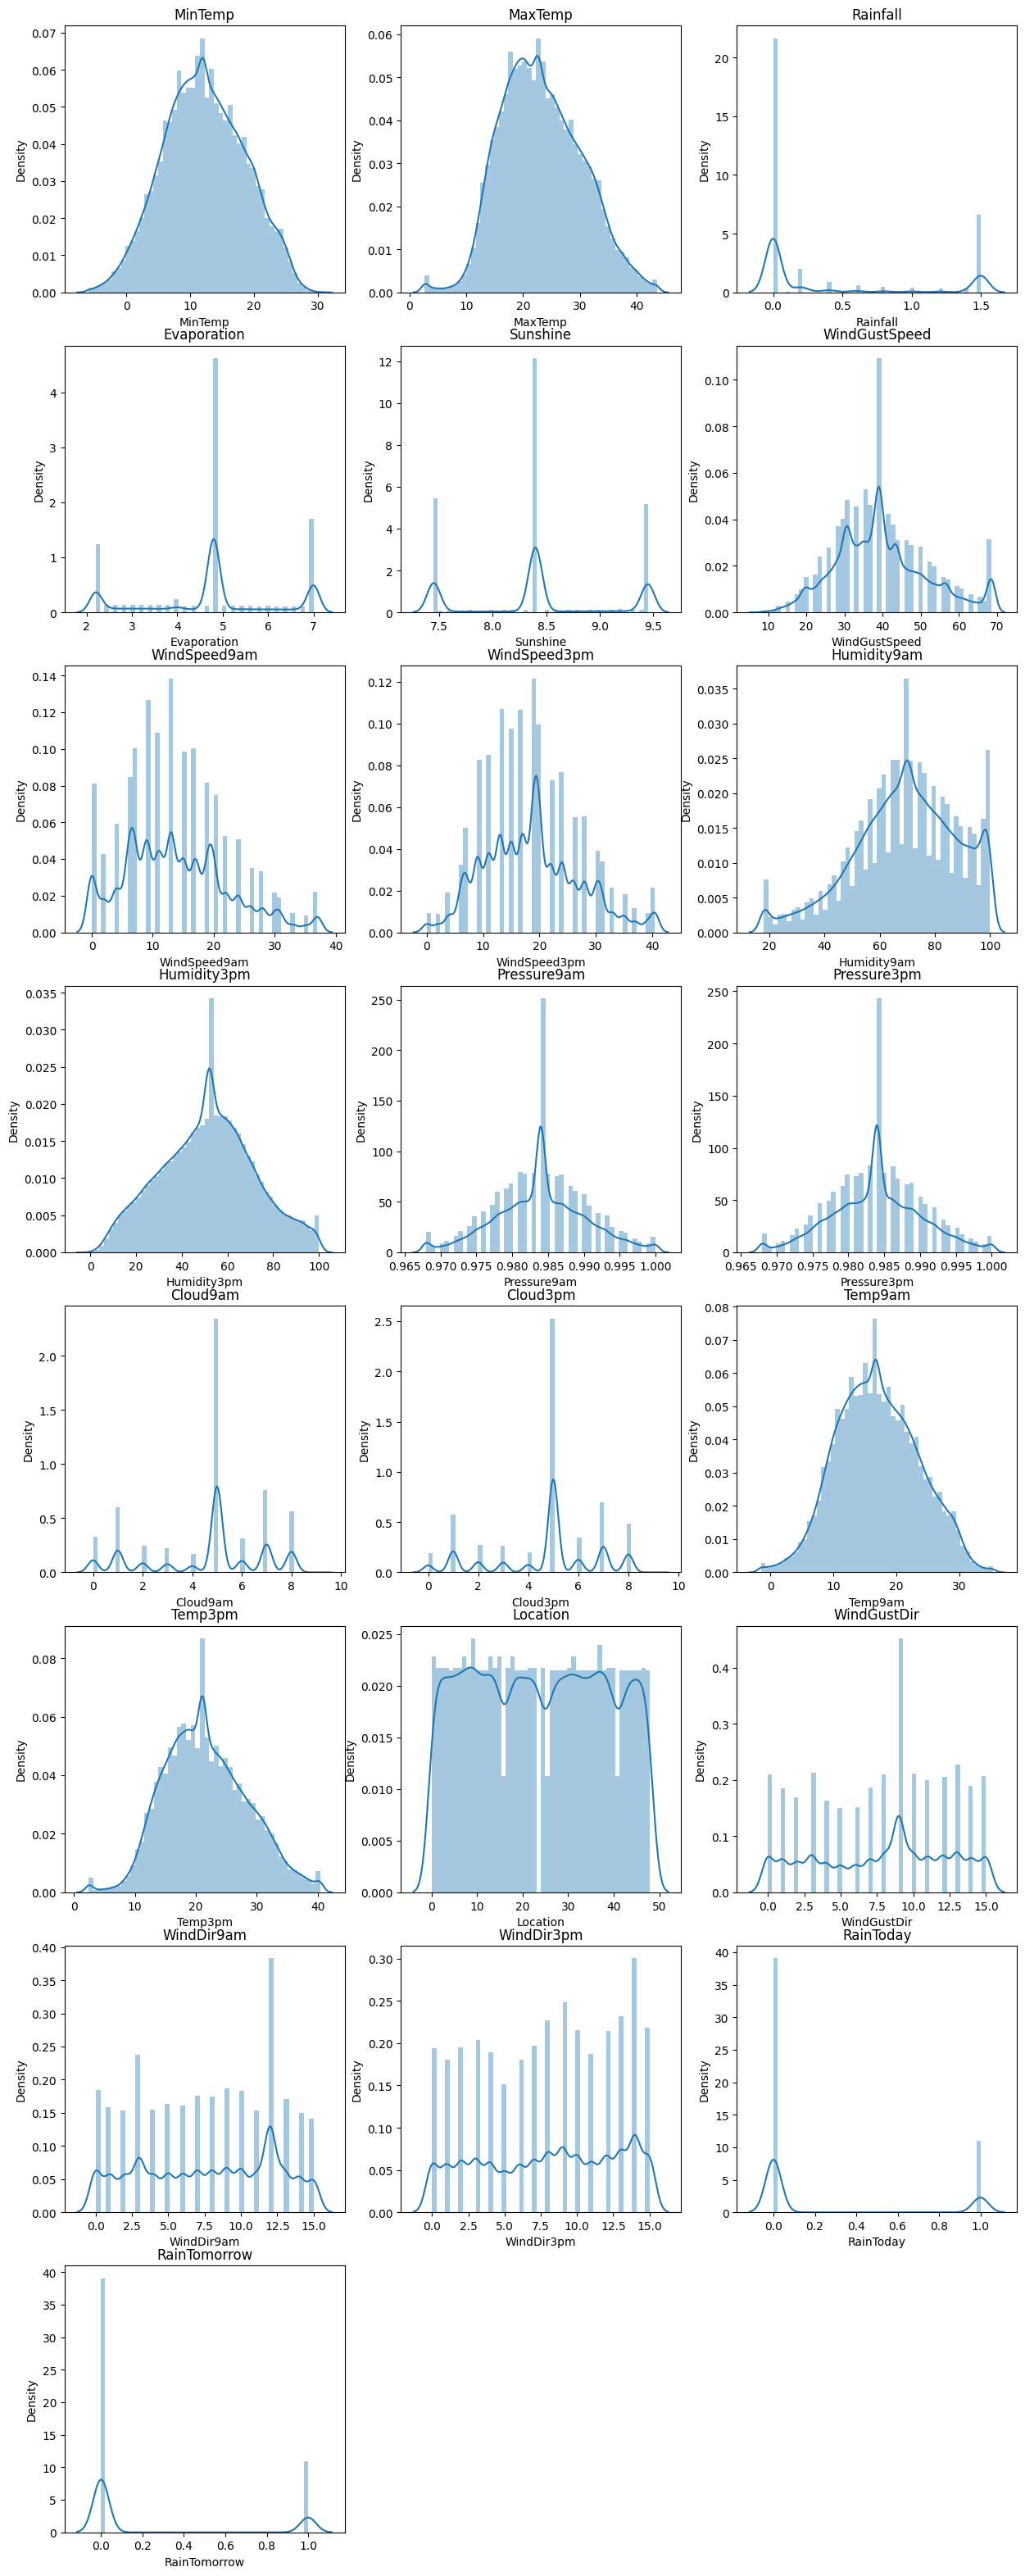

In [100]:
plt.figure(figsize=(15,60))
for val in enumerate(data.columns) :
        plt.subplot(12,3,val[0]+1)
        sns.distplot(data[val[1]])
        plt.title(val[1])

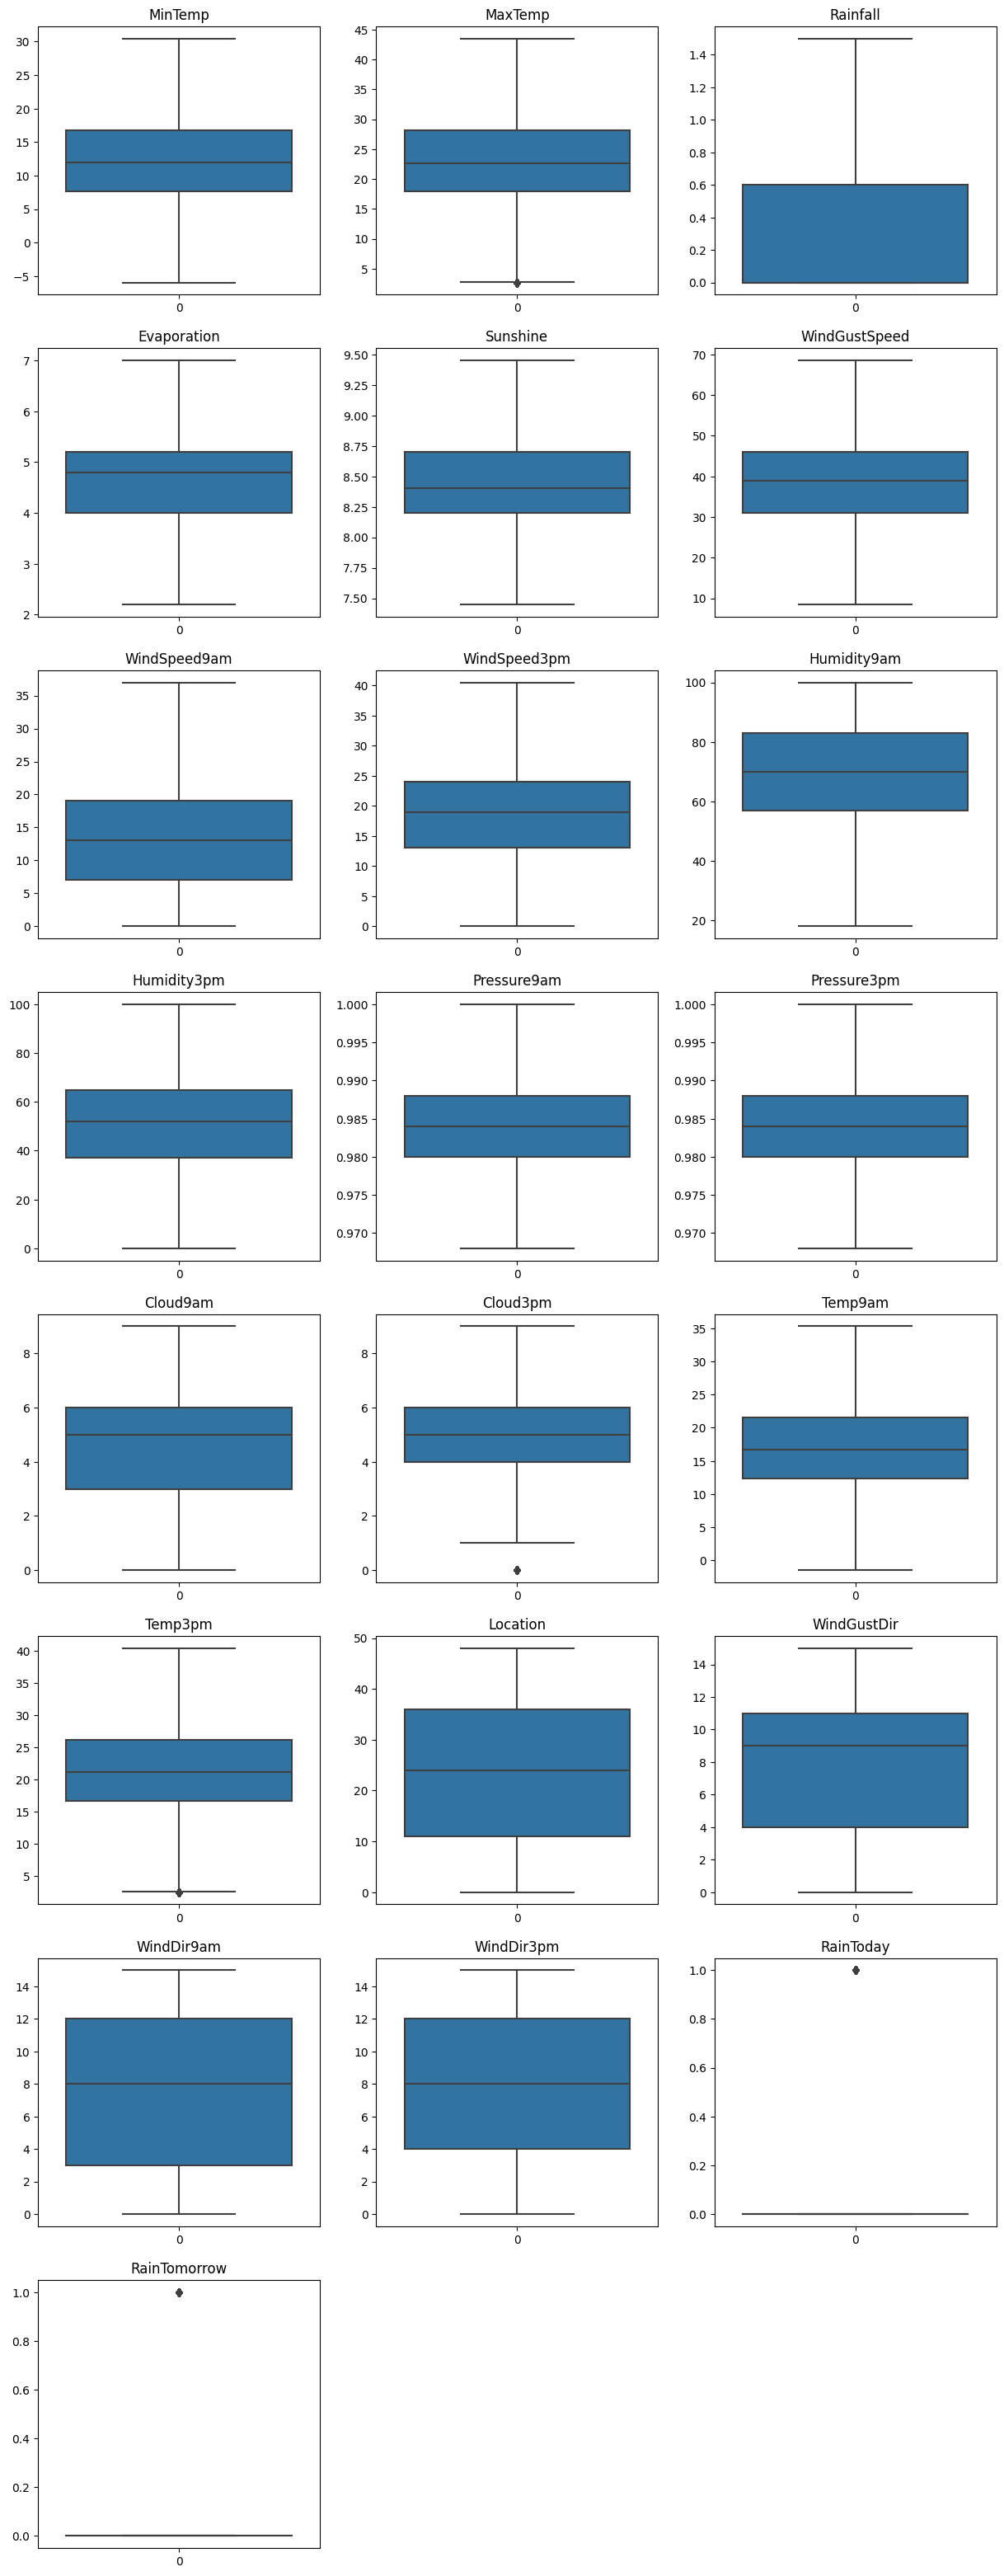

In [101]:
plt.figure(figsize=(15,60))
for val in enumerate(data.columns) :
        plt.subplot(12,3,val[0]+1)
        sns.boxplot(data[val[1]])
        plt.title(val[1])

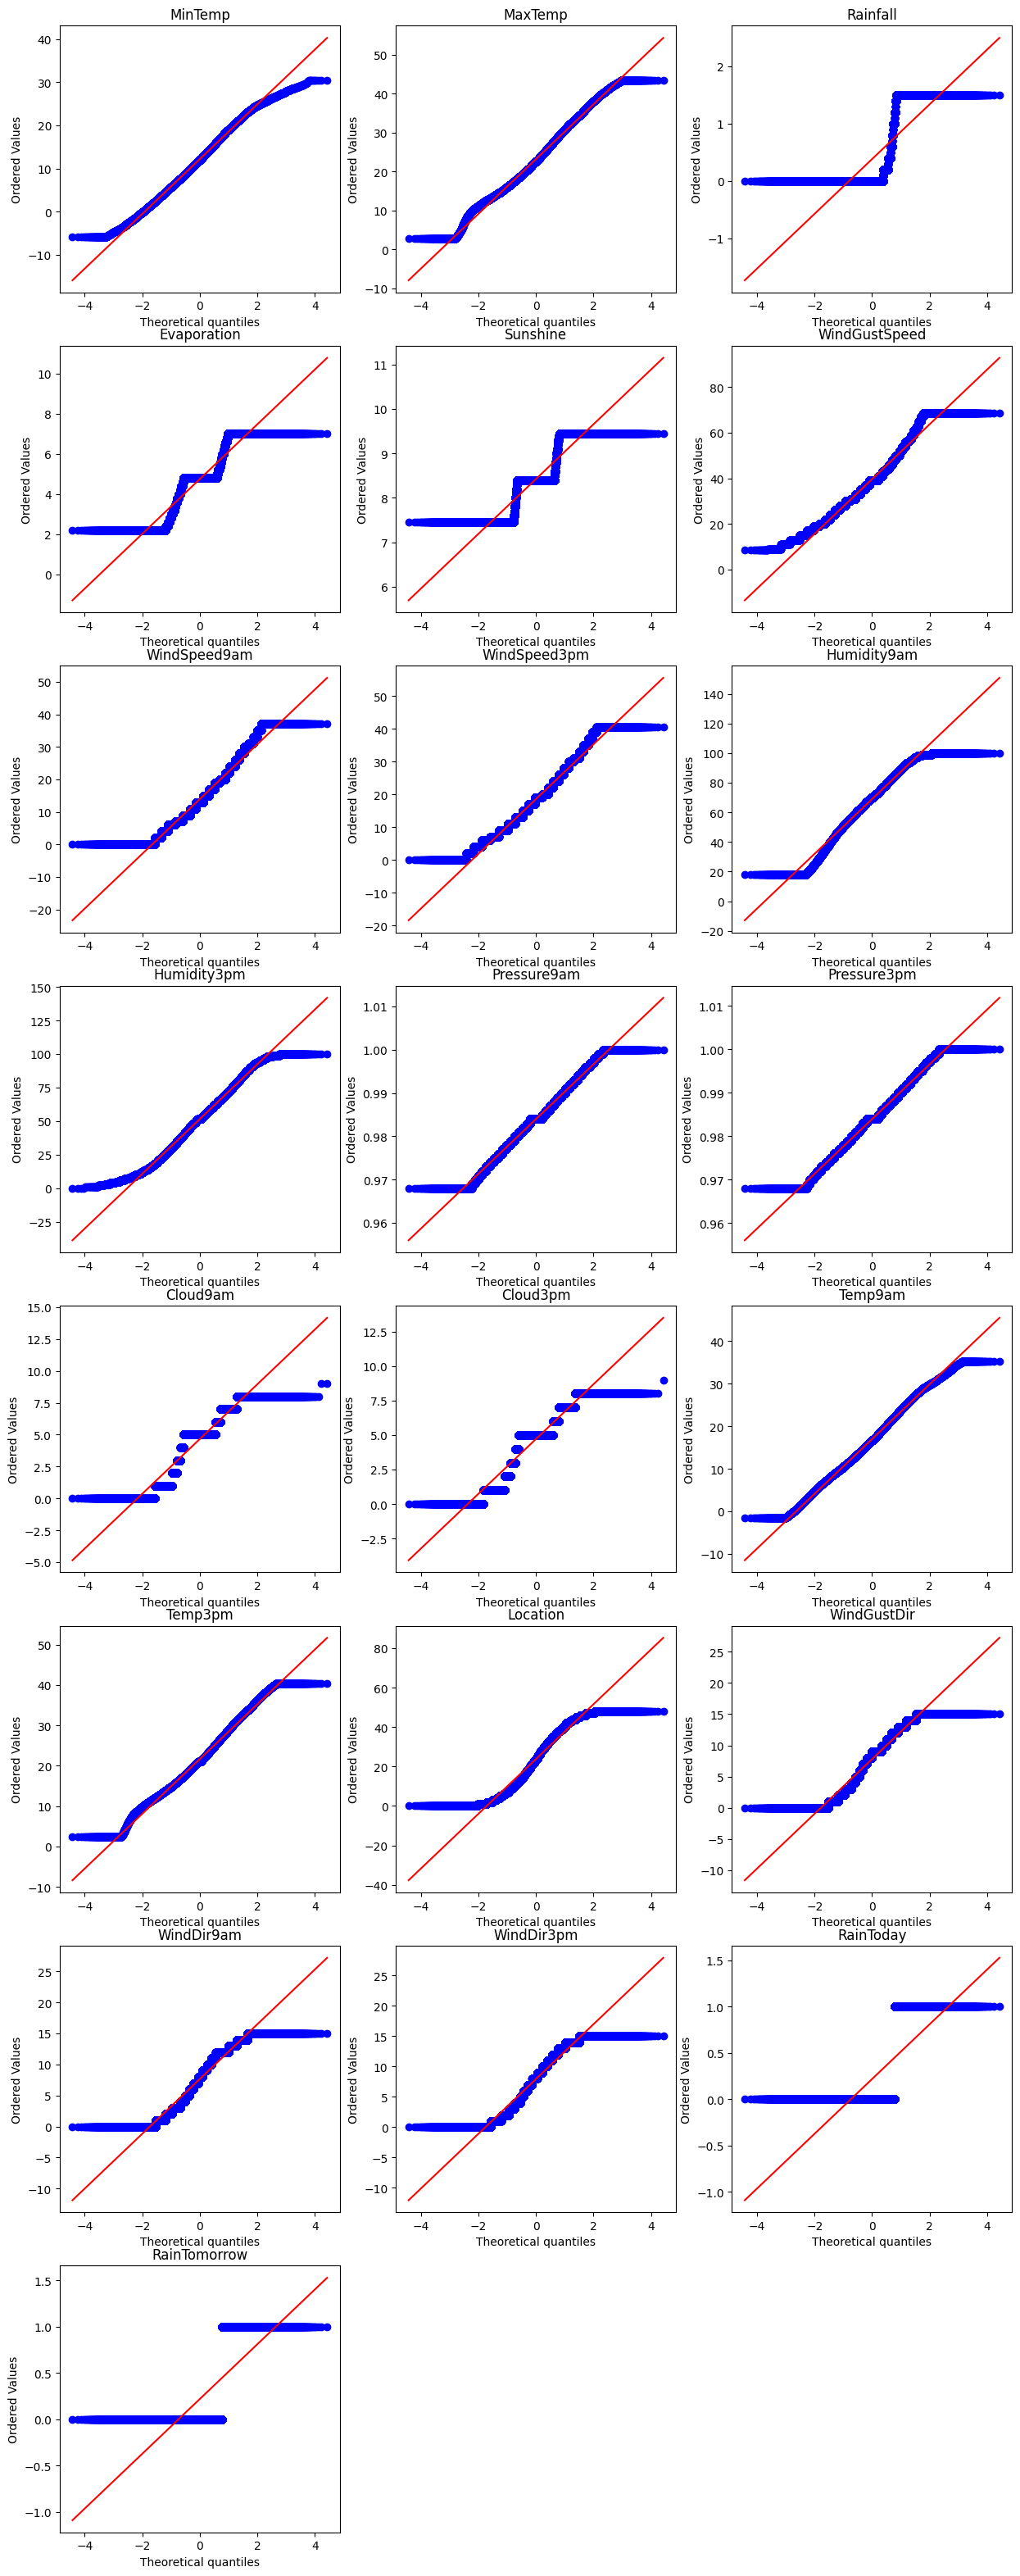

In [103]:
plt.figure(figsize=(15,60))
for val in enumerate(data.columns) :
        plt.subplot(12,3,val[0]+1)
        stats.probplot(data[val[1]], dist="norm", plot=plt)
        plt.title(val[1])

### Multivariate analysis

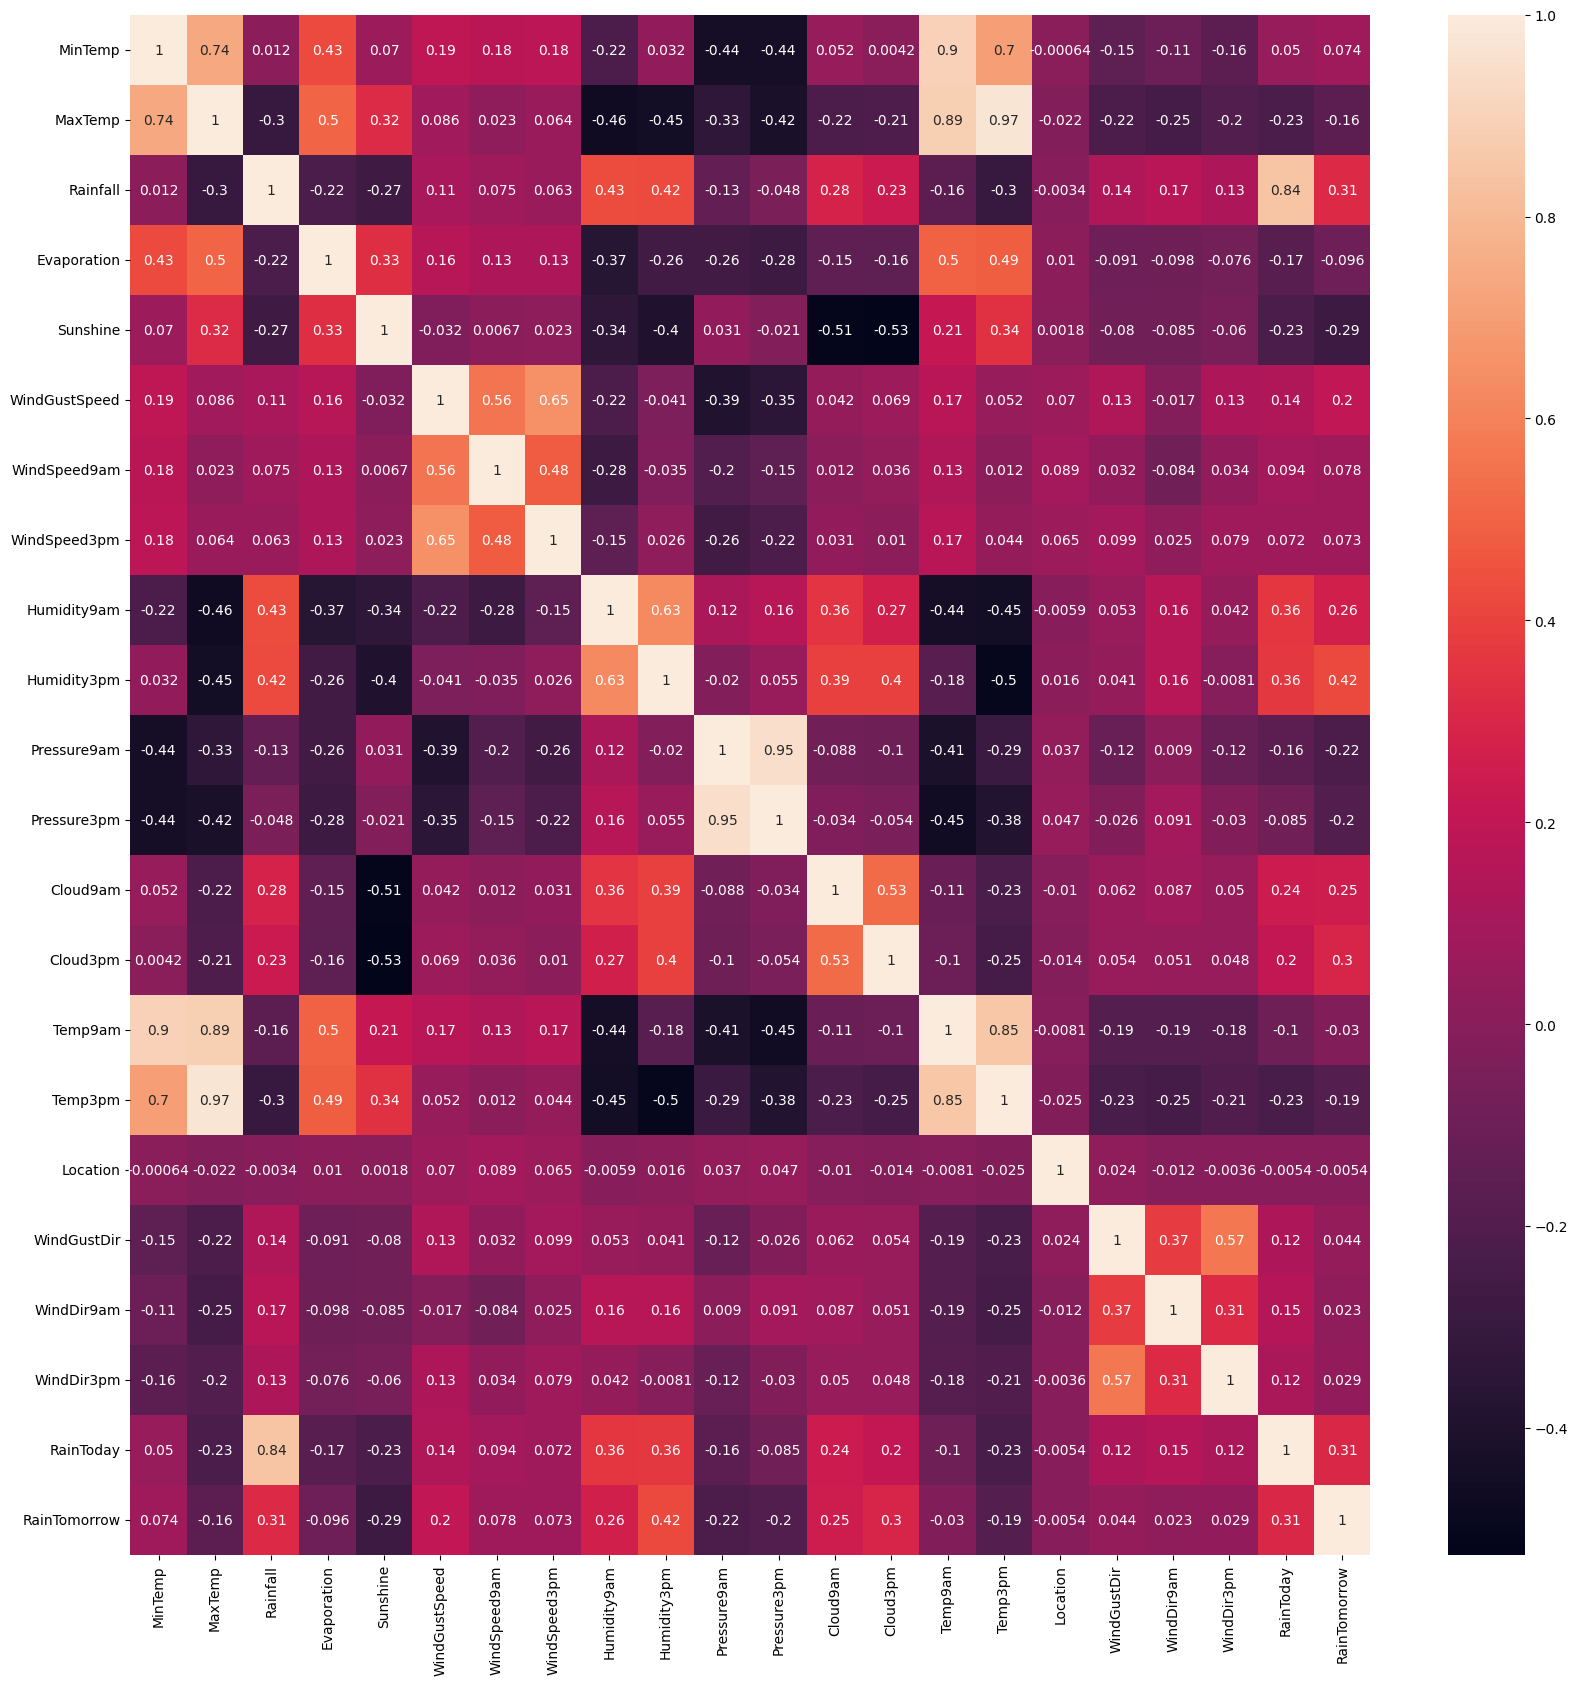

In [104]:
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

# Model traning

In [105]:
X = data.drop(["RainTomorrow"], axis = 1)
y = data["RainTomorrow"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 5)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(144005, 21)
(1455, 21)
(144005,)
(1455,)


In [108]:
model = RandomForestClassifier(n_estimators=100)

In [109]:
clf = model.fit(X_train, y_train)

In [110]:
y_pred = clf.predict(X_test)

In [111]:
accuracy_score(y_test, y_pred)

0.8570446735395189

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1132
           1       0.76      0.51      0.61       323

    accuracy                           0.86      1455
   macro avg       0.82      0.73      0.76      1455
weighted avg       0.85      0.86      0.85      1455



In [114]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1081   51]
 [ 157  166]]

True Positives(TP) =  1081

True Negatives(TN) =  166

False Positives(FP) =  51

False Negatives(FN) =  157


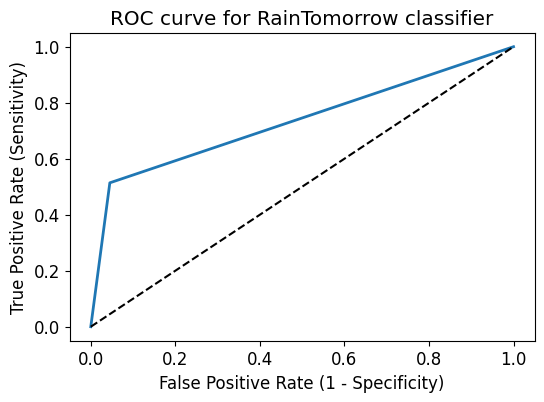

In [118]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Predictive system


In [122]:
input_data = (13.400,22.900,0.600,4.800,8.400,44.000,20.000,24.000,71.000,22.000,0.974,0.976,8.000,5.000,16.900,21.800,2,13,13,14,0)
 
input_data_nparr = np.asarray(input_data)

input_data_reshaped = input_data_nparr.reshape(1,-1)

print(input_data_reshaped)

Price_prediction = clf.predict(input_data_reshaped)

print(Price_prediction)

[[13.4   22.9    0.6    4.8    8.4   44.    20.    24.    71.    22.
   0.974  0.976  8.     5.    16.9   21.8    2.    13.    13.    14.
   0.   ]]
[0]


# Model Saving

In [123]:
import pickle
filename = "random_forest_classifier.sav"
pickle.dump(clf, open(filename,'wb'))

loaded_model = pickle.load(open('random_forest_classifier.sav','rb'))
input_data = (13.400,22.900,0.600,4.800,8.400,44.000,20.000,24.000,71.000,22.000,0.974,0.976,8.000,5.000,16.900,21.800,2,13,13,14,0)
input_data_nparr = np.asarray(input_data)
input_data_reshaped = input_data_nparr.reshape(1,-1)
print(input_data_reshaped)
Price_prediction = loaded_model.predict(input_data_reshaped)
print(Price_prediction)

[[13.4   22.9    0.6    4.8    8.4   44.    20.    24.    71.    22.
   0.974  0.976  8.     5.    16.9   21.8    2.    13.    13.    14.
   0.   ]]
[0]
